In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import time

In [2]:
import description

In [3]:
df_train=pd.read_csv("df_train2018-04-09-20-31-26.csv")#训练数据
mis_df_train=pd.read_csv("mis_df_train2018-04-09-20-33-23.csv")

In [4]:
def save(filename,name):
    filename.to_csv(name+time.strftime('%Y-%m-%d-%H-%M-%S',time.localtime(time.time()))+".csv")

In [5]:
df_train=pd.read_csv("train.csv")#训练数据
df_test=pd.read_csv("test.csv")#测试数据

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
#曾加一列数据区分训练集和测试集
df_train['train1_test0'] = 1
df_test['train1_test0'] = 0
#合并训练集、测试集
df = pd.concat([df_train,df_test])

In [11]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,train1_test0
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,0,Pave,8,856.0,AllPub,0,2003,2003,2008,1
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,1
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0,Pave,6,920.0,AllPub,0,2001,2002,2008,1
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0,Pave,7,756.0,AllPub,0,1915,1970,2006,1
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,1


# 数据类型基本分析

In [12]:
set(df_train.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [13]:
df_train_des=description.describe_df(df_train)
missing_train,micol_train,nomicol_train=df_train_des.missing_coulmns()

In [14]:
missing_train.sort_values(by = 'Total', axis =0, ascending = False) 

,Types,Total,Percent
PoolQC,object,1453,0.995205
MiscFeature,object,1406,0.963014
Alley,object,1369,0.937671
Fence,object,1179,0.807534
FireplaceQu,object,690,0.472603
LotFrontage,float64,259,0.177397
GarageType,object,81,0.055479
GarageYrBlt,float64,81,0.055479
GarageCond,object,81,0.055479
GarageQual,object,81,0.055479


In [19]:
df_train.shape

(1460, 82)

In [50]:
#30%的特征有缺失数据,总共有81个变量（含目标变量）
len(micol_train)/len(nomicol_train)

0.30158730158730157

In [15]:
ob_train,notob_train,int_64_train,float_64_train=df_train_des.valtype_divide()

In [16]:
df_test_des=description.describe_df(df_test)
missing_test,micol_test,nomicol_test=df_test_des.missing_coulmns()
ob_test,notob_test,int_64_test,float_64_test=df_test_des.valtype_divide()

In [34]:
missing_test.sort_values(by = 'Total', axis =0, ascending = False) 

,Types,Total,Percent
PoolQC,object,1456,0.997944
MiscFeature,object,1408,0.965045
Alley,object,1352,0.926662
Fence,object,1169,0.801234
FireplaceQu,object,730,0.500343
LotFrontage,float64,227,0.155586
GarageFinish,object,78,0.053461
GarageQual,object,78,0.053461
GarageCond,object,78,0.053461
GarageYrBlt,float64,78,0.053461


In [36]:
df_test.shape

(1459, 81)

In [35]:
#68%特征有缺失值（不含目标变量）
len(micol_test)/len(nomicol_test)

0.6875

In [17]:
#训练集特征和测试集特征数量一致
contain_df=df_test_des.contain_describe(df_train,"contain_test",'contain_train')
contain_df.sort_values(by = 'contain_train', axis =0) 

,col,contain_test,contain_train
0,Neighborhood,1,1
58,BldgType,1,1
57,MoSold,1,1
56,HouseStyle,1,1
55,ExterCond,1,1
54,BsmtQual,1,1
53,BsmtFinSF1,1,1
52,RoofStyle,1,1
59,ScreenPorch,1,1
51,YearBuilt,1,1


In [20]:
#含有缺失值的样本
df_train_T=df_train.T
df_train[df_train_T.isnull().any()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train1_test0
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,1
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,1
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,1
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,1
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2008,WD,Normal,118000,1


In [89]:
df_train.shape

(1460, 83)

In [21]:
miss_percent=(df_train_T.isnull().sum()/82)*100
miss_percent.name='miss_percent'

In [22]:
df_train=pd.concat([df_train,miss_percent],axis=1)

In [23]:
df_train.sort_values(by = 'miss_percent', axis =0, ascending = False) 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train1_test0,miss_percent
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,6,2008,WD,AdjLand,82000,1,18.292683
1011,1012,90,RL,75.0,9825,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2010,WD,Normal,100000,1,18.292683
1218,1219,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,7,2006,WD,Normal,80500,1,18.292683
533,534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,...,NaN,NaN,0,1,2007,WD,Normal,39300,1,18.292683
1179,1180,20,RL,77.0,8335,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2006,WD,Normal,93000,1,17.073171
705,706,190,RM,70.0,5600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,Othr,3500,7,2010,WD,Normal,55000,1,17.073171
520,521,190,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2008,WD,Normal,106250,1,17.073171
1143,1144,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,7,2008,WD,Normal,80000,1,13.414634
1035,1036,20,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,1,2009,WD,Normal,84000,1,13.414634
1030,1031,190,RH,NaN,7082,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,7,2006,WD,Normal,160000,1,13.414634


# 缺失值处理

In [57]:
missing_train[missing_train['Total']>0].sort_values(by = 'Total', axis =0, ascending = False) 

,Types,Total,Percent
PoolQC,object,1453,0.995205
MiscFeature,object,1406,0.963014
Alley,object,1369,0.937671
Fence,object,1179,0.807534
FireplaceQu,object,690,0.472603
LotFrontage,float64,259,0.177397
GarageType,object,81,0.055479
GarageYrBlt,float64,81,0.055479
GarageFinish,object,81,0.055479
GarageQual,object,81,0.055479


In [25]:
mis_df_train=df_train[micol_train]
mis_df_train=mis_df_train.isnull()
mis_df_train=mis_df_train.join(df_train[nomicol_train])

In [26]:
mis_df_train.head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train1_test0
0,False,True,False,False,False,False,False,False,False,False,...,0,0,0,0,2,2008,WD,Normal,208500,1
1,False,True,False,False,False,False,False,False,False,False,...,0,0,0,0,5,2007,WD,Normal,181500,1
2,False,True,False,False,False,False,False,False,False,False,...,0,0,0,0,9,2008,WD,Normal,223500,1
3,False,True,False,False,False,False,False,False,False,False,...,0,0,0,0,2,2006,WD,Abnorml,140000,1
4,False,True,False,False,False,False,False,False,False,False,...,0,0,0,0,12,2008,WD,Normal,250000,1


In [28]:
nomisob=list(set(nomicol_train)&set(ob_train))
nomisnob=list(set(nomicol_train)&set(notob_train))

In [96]:
nomisob

['ExterCond',
 'SaleCondition',
 'Utilities',
 'CentralAir',
 'Foundation',
 'Exterior1st',
 'Functional',
 'PavedDrive',
 'MSZoning',
 'BldgType',
 'HeatingQC',
 'Neighborhood',
 'LandSlope',
 'KitchenQual',
 'RoofStyle',
 'LandContour',
 'Exterior2nd',
 'HouseStyle',
 'Heating',
 'RoofMatl',
 'Condition2',
 'ExterQual',
 'Condition1',
 'LotShape',
 'Street',
 'LotConfig',
 'SaleType']

In [97]:
nomisnob

['OverallCond',
 'BsmtUnfSF',
 'MiscVal',
 'BsmtFinSF1',
 'OverallQual',
 'SalePrice',
 'train1_test0',
 'EnclosedPorch',
 'ScreenPorch',
 'MSSubClass',
 'BsmtFullBath',
 'PoolArea',
 'BsmtFinSF2',
 'KitchenAbvGr',
 'YearRemodAdd',
 'LowQualFinSF',
 'Id',
 'TotalBsmtSF',
 'WoodDeckSF',
 'MoSold',
 'BedroomAbvGr',
 '3SsnPorch',
 'YrSold',
 'FullBath',
 'GrLivArea',
 'HalfBath',
 'YearBuilt',
 'OpenPorchSF',
 'Fireplaces',
 'TotRmsAbvGrd',
 'GarageCars',
 'LotArea',
 '2ndFlrSF',
 '1stFlrSF',
 'GarageArea',
 'BsmtHalfBath']

In [3]:
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2
from scipy.stats import levene
from sklearn.feature_selection import f_classif
from FisherExact.Fisher import fisher_exact
from minepy import MINE

class missing_handle(object):
    def __init__(self,df):
        self.df = df
    #卡方分析1
    def dis_chisquare1(self, varlist, target):
        df = self.df
        chisquare_dict = {}
        for var in varlist:
            table = pd.crosstab(df[var],df[target],margins=False).values
            value, p, dof, expected = chi2_contingency(table)
            chisquare_dict[var] = [value,p]
        chisquare_table = pd.DataFrame(chisquare_dict).T
        chisquare_table.columns = ['Value','P']
        chisquare_table = chisquare_table.sort_values('Value',axis =0, ascending = False)
        return chisquare_table
        
    #卡方分析2（连续-target类别）
    def dis_chisquare2(self, varlist, target):
        df = self.df
        chisquare_dict={}
        X = df[varlist].values
        y = df[target].values
        Value,P = chi2(X,y) 
        for i in range(len(varlist)):
            chisquare_dict[varlist[i]] = [Value[i],P[i]]
        chisquare_table = pd.DataFrame(chisquare_dict).T
        chisquare_table.columns=['Value','P']
        chisquare_table = chisquare_table.sort_values('Value',axis =0, ascending = False)
        return chisquare_table
    
    # 存在问题
    def dis_fisher(self, varlist, target):
        df = self.df
        fisher_dict={}
        for var in varlist:
            table=pd.crosstab(df[var],df[target],margins=False).values
            p=fisher_exact(table)
            fisher_dict[var] = [p]
        fisher_table = pd.DataFrame(fisher_dict).T
        fisher_table.columns=['P']
        fisher_table = fisher_table.sort_values('P',axis =0, ascending = True)
        return fisher_table
        
        
    #方差分析（连续-类别）
    #方差齐性测试
    def dis_levene(self, varlist, target, pvalue):
        df = self.df
        levenelist=[]
        true_df=df[df[target]==True]
        false_df=df[df[target]==False]
        for var in varlist:
            args=[true_df[var].values,false_df[var].values]
            value,p=levene(*args)
            #大于p方差齐
            if p > pvalue:
                levenelist.append(var)
        return levenelist

    def dis_f_oneway(self, varlist, target):
        df = self.df
        oneway_dict={}
        X = df[varlist].values
        y = df[target].values
        Value,P = f_classif(X,y)
        for i in range(len(varlist)):
            oneway_dict[varlist[i]] = [Value[i],P[i]]
        oneway_table = pd.DataFrame(oneway_dict).T
        oneway_table.columns=['Value','P']
        oneway_table = oneway_table.sort_values('Value',axis =0, ascending = False)
        return oneway_table
    #信息熵
    def dis_ent(self, varlist):
        df = self.df
        ent_dict={}
        for i in varlist:
            ent = calc_ent(df[i])
            ent_dict[i] = env
        ent_table = pd.DataFrame(ent_dict).T
        ent_table.columns=['env']
        ent_table = ent_table.sort_values('env', axis=0, ascending = True)
        return env_table
    
    #互信息法
    def dis_MutuInfo(self, varlist, target):
        df = self.df
        MutuInfo_dict={}
        for i in varlist:
            mine = MINE()
            mine.compute_score(df[i],df[y])
            MutuInfo_dict[i] = mine..mic()
        MutuInfo_table.columns=['MutuInfo']
        MutuInfo_table = MutuInfo_table.sort_values('MutuInfo', axis=0, ascending = True)
        return MutuInfo_table
     
def calc_ent(x):
    """
        calculate shanno ent of x
    """

    x_value_list = set([x[i] for i in range(x.shape[0])])
    ent = 0.0
    for x_value in x_value_list:
        p = float(x[x == x_value].shape[0]) / x.shape[0]
        logp = np.log2(p)
        ent -= p * logp

    return ent

In [53]:
missing_handle_find=missing_handle(mis_df_train)

# PoolQC、MiscFeature、Alley、Fence、FireplaceQu数据中已经有定义

In [16]:
def obclass(df, varlist):
    varclass_dict={}
    for var in varlist:
        rank = set(df[var])
        num = len(rank)
        varclass_dict[var] = [num, rank]
    varclass_table = pd.DataFrame(varclass_dict).T
    varclass_table.columns=['type_num','class']
    varclass_table = varclass_table.sort_values('type_num',axis =0, ascending = True)
    return varclass_table

# LotFrontage

In [11]:
nomisob=['ExterCond',
         'SaleCondition', 
         'Utilities',
         'CentralAir',
         'Foundation',
         'Exterior1st',
         'Functional',
         'PavedDrive',
         'MSZoning',
         'BldgType',
         'HeatingQC',
         'Neighborhood',
         'LandSlope',
         'KitchenQual',
         'RoofStyle',
         'LandContour',
         'Exterior2nd',
         'HouseStyle',
         'Heating',
         'RoofMatl',
         'Condition2',
         'ExterQual',
         'Condition1',
         'LotShape',
         'Street',
         'LotConfig',
         'SaleType']

In [6]:
nomisnob=['OverallCond',
 'BsmtUnfSF',
 'MiscVal',
 'BsmtFinSF1',
 'OverallQual',
 'SalePrice',
 'train1_test0',
 'EnclosedPorch',
 'ScreenPorch',
 'MSSubClass',
 'BsmtFullBath',
 'PoolArea',
 'BsmtFinSF2',
 'KitchenAbvGr',
 'YearRemodAdd',
 'LowQualFinSF',
 'TotalBsmtSF',
 'WoodDeckSF',
 'MoSold',
 'BedroomAbvGr',
 '3SsnPorch',
 'YrSold',
 'FullBath',
 'GrLivArea',
 'HalfBath',
 'YearBuilt',
 'OpenPorchSF',
 'Fireplaces',
 'TotRmsAbvGrd',
 'GarageCars',
 'LotArea',
 '2ndFlrSF',
 '1stFlrSF',
 'GarageArea',
 'BsmtHalfBath']

In [20]:
for var in nomisob:
    print(var+':')
    print(pd.crosstab(mis_df_train[var],mis_df_train['LotFrontage'],margins=False))

ExterCond:
LotFrontage  False  True 
ExterCond                
Ex               3      0
Fa              25      3
Gd             112     34
Po               1      0
TA            1060    222
SaleCondition:
LotFrontage    False  True 
SaleCondition              
Abnorml           84     17
AdjLand            4      0
Alloca            10      2
Family            18      2
Normal           961    237
Partial          124      1
Utilities:
LotFrontage  False  True 
Utilities                
AllPub        1201    258
NoSeWa           0      1
CentralAir:
LotFrontage  False  True 
CentralAir               
N               88      7
Y             1113    252
Foundation:
LotFrontage  False  True 
Foundation               
BrkTil         138      8
CBlock         494    140
PConc          542    105
Slab            19      5
Stone            6      0
Wood             2      1
Exterior1st:
LotFrontage  False  True 
Exterior1st              
AsbShng         19      1
AsphShn          1      0


In [12]:
chi_list = ['CentralAir','PavedDrive','LandSlope']
fisher_list = list(set(nomisob)-set(chi_list))

In [52]:
mshd = missing_handle(mis_df_train)

In [26]:
mshd.dis_chisquare1(chi_list,'LotFrontage')

,Value,P
LandSlope,20.860909,0.000030
CentralAir,6.748966,0.009380
PavedDrive,3.989784,0.136028


In [18]:
fisher_listtable=obclass(mis_df_train, fisher_list)

In [20]:
fisher_listtable

,type_num,class
Utilities,2,"{AllPub, NoSeWa}"
Street,2,"{Pave, Grvl}"
LotShape,4,"{IR2, Reg, IR1, IR3}"
ExterQual,4,"{Fa, TA, Gd, Ex}"
LandContour,4,"{Low, HLS, Lvl, Bnk}"
KitchenQual,4,"{Fa, TA, Gd, Ex}"
MSZoning,5,"{C (all), RM, RL, RH, FV}"
LotConfig,5,"{FR3, Inside, Corner, CulDSac, FR2}"
HeatingQC,5,"{Fa, Po, Ex, TA, Gd}"
BldgType,5,"{Twnhs, 2fmCon, TwnhsE, 1Fam, Duplex}"


In [19]:
fisher_listtable.index

Index(['Utilities', 'Street', 'LotShape', 'ExterQual', 'LandContour',
       'KitchenQual', 'MSZoning', 'LotConfig', 'HeatingQC', 'BldgType',
       'ExterCond', 'Foundation', 'RoofStyle', 'SaleCondition', 'Heating',
       'Functional', 'Condition2', 'RoofMatl', 'HouseStyle', 'Condition1',
       'SaleType', 'Exterior1st', 'Exterior2nd', 'Neighborhood'],
      dtype='object')

In [21]:
mshd.dis_fisher(['Utilities', 'Street', 'LotShape', 'ExterQual', 'LandContour',
       'KitchenQual', 'MSZoning', 'LotConfig', 'HeatingQC', 'BldgType',
       'ExterCond', 'Foundation', 'RoofStyle', 'SaleCondition', 'Heating'],'LotFrontage')

,P
Street,1.000000e+00
ExterCond,3.402259e-01
ExterQual,3.069758e-01
Utilities,1.773973e-01
HeatingQC,1.443483e-01
BldgType,9.969307e-02
Heating,8.570749e-02
RoofStyle,3.396632e-03
KitchenQual,2.619252e-03
MSZoning,2.760789e-04


In [54]:
nob_leve = mshd.dis_levene(nomisnob,'LotFrontage',0.05)

/home/zhang/miniconda3/envs/gluon/lib/python3.6/site-packages/scipy/stats/morestats.py:1965: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


In [55]:
mshd.dis_f_oneway(nob_leve,'LotFrontage')

,Value,P
BsmtFinSF1,8.991553,0.002758
BsmtFinSF2,3.327316,0.068343
LowQualFinSF,1.728043,0.188868
BsmtHalfBath,1.383583,0.239684
EnclosedPorch,1.094091,0.295740
OverallCond,0.968641,0.325183
1stFlrSF,0.794706,0.372828
TotRmsAbvGrd,0.791778,0.373710
OpenPorchSF,0.768725,0.380756
YrSold,0.657427,0.417602


In [56]:
mshd.dis_chisquare2(nomisnob,"LotFrontage")

,Value,P
LotArea,205592.504665,0.000000e+00
MiscVal,50430.643721,0.000000e+00
BsmtUnfSF,5831.969667,0.000000e+00
BsmtFinSF1,4193.228097,0.000000e+00
BsmtFinSF2,1857.210141,0.000000e+00
WoodDeckSF,1764.133882,0.000000e+00
SalePrice,850.006489,7.246955e-187
LowQualFinSF,698.672824,5.811761e-154
EnclosedPorch,186.150422,2.201178e-42
3SsnPorch,159.994087,1.134855e-36


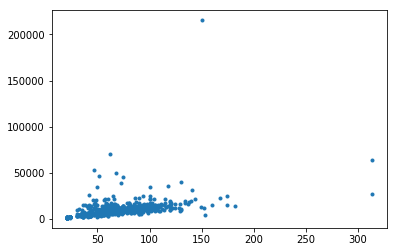

In [58]:
grap_df = df_train[df_train["LotFrontage"].notnull()]
plt.plot(grap_df["LotFrontage"],grap_df["LotArea"],'.')

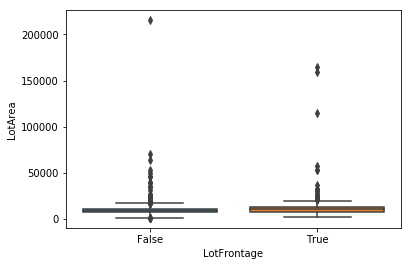

In [59]:
sns.boxplot(x="LotFrontage", y="LotArea", data=mis_df_train)

In [ ]:
去除异常值后建立线性模型

# GarageType、GarageYrBlt、GarageFinish、GarageQual、GarageCond


In [16]:
df_train[df_train['GarageType'].isnull()][['GarageType',
                                           'GarageYrBlt',
                                           'GarageFinish',
                                           'GarageQual',
                                           'GarageCond']].shape

(81, 5)

# BsmtExposure、BsmtFinType2、BsmtQual、BsmtCond、BsmtFinType1

In [64]:
df_train[df_train['BsmtFinType2'].isnull()][['BsmtFinSF2','BsmtFinSF1','BsmtExposure',
                                         'BsmtFinType2',
                                         'BsmtQual',
                                         'BsmtCond',
                                         'BsmtFinType1']]

,BsmtFinSF2,BsmtFinSF1,BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1
17,0,0,NaN,NaN,NaN,NaN,NaN
39,0,0,NaN,NaN,NaN,NaN,NaN
90,0,0,NaN,NaN,NaN,NaN,NaN
102,0,0,NaN,NaN,NaN,NaN,NaN
156,0,0,NaN,NaN,NaN,NaN,NaN
182,0,0,NaN,NaN,NaN,NaN,NaN
259,0,0,NaN,NaN,NaN,NaN,NaN
332,479,1124,No,NaN,Gd,TA,GLQ
342,0,0,NaN,NaN,NaN,NaN,NaN
362,0,0,NaN,NaN,NaN,NaN,NaN


In [65]:
df_train[df_train['BsmtExposure'].isnull()][['BsmtFinSF2','BsmtFinSF1','BsmtExposure',
                                         'BsmtFinType2',
                                         'BsmtQual',
                                         'BsmtCond',
                                         'BsmtFinType1']]

,BsmtFinSF2,BsmtFinSF1,BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1
17,0,0,NaN,NaN,NaN,NaN,NaN
39,0,0,NaN,NaN,NaN,NaN,NaN
90,0,0,NaN,NaN,NaN,NaN,NaN
102,0,0,NaN,NaN,NaN,NaN,NaN
156,0,0,NaN,NaN,NaN,NaN,NaN
182,0,0,NaN,NaN,NaN,NaN,NaN
259,0,0,NaN,NaN,NaN,NaN,NaN
342,0,0,NaN,NaN,NaN,NaN,NaN
362,0,0,NaN,NaN,NaN,NaN,NaN
371,0,0,NaN,NaN,NaN,NaN,NaN


# MasVnrArea

In [47]:
df_train[df_train['MasVnrArea'].isnull()][['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


# MasVnrType

In [54]:
df_train[df_train['MasVnrType']!='None'][['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
0,196.0,BrkFace
2,162.0,BrkFace
4,350.0,BrkFace
6,186.0,Stone
7,240.0,Stone
11,286.0,Stone
13,306.0,Stone
14,212.0,BrkFace
16,180.0,BrkFace
20,380.0,BrkFace


In [64]:
for var in nomisob:
    print(var+':')
    print(pd.crosstab(df_train[var],df_train['MasVnrType'],margins=False))

ExterCond:
MasVnrType  BrkCmn  BrkFace  None  Stone
ExterCond                               
Ex               0        0     3      0
Fa               1        3    24      0
Gd               2       39   103      2
Po               0        0     1      0
TA              12      403   733    126
SaleCondition:
MasVnrType     BrkCmn  BrkFace  None  Stone
SaleCondition                              
Abnorml             4       27    67      3
AdjLand             0        1     3      0
Alloca              1        1     8      1
Family              0        8    11      1
Normal             10      375   735     74
Partial             0       33    40     49
Utilities:
MasVnrType  BrkCmn  BrkFace  None  Stone
Utilities                               
AllPub          15      444   864    128
NoSeWa           0        1     0      0
CentralAir:
MasVnrType  BrkCmn  BrkFace  None  Stone
CentralAir                              
N                0        6    89      0
Y               15      4

In [4]:
from scipy.stats import pearsonr

In [10]:
def pearsonrs(df,varlist,target):
    df = df[df[target].notnull()]
    pearson_dict={}
    for var in varlist:
        Value,P = pearsonr(df[target],df[var])
        pearson_dict[var] = [Value, P]
    pearson_table = pd.DataFrame(pearson_dict).T
    pearson_table.columns=['Value','P']
    pearson_table = pearson_table.sort_values('Value',axis =0, ascending = False)
    return pearson_table

In [11]:
pearsonrs(df_train, nomisnob, "MasVnrArea")

/home/zhang/miniconda3/envs/gluon/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


,Value,P
SalePrice,0.477493,1.458509e-83
OverallQual,0.411876,1.487730e-60
GrLivArea,0.390857,3.379757e-54
GarageArea,0.373066,3.626847e-49
GarageCars,0.364204,8.931049e-47
TotalBsmtSF,0.363936,1.051710e-46
1stFlrSF,0.344501,1.007867e-41
YearBuilt,0.315707,5.756413e-35
TotRmsAbvGrd,0.280682,1.076999e-27
FullBath,0.276833,5.897485e-27


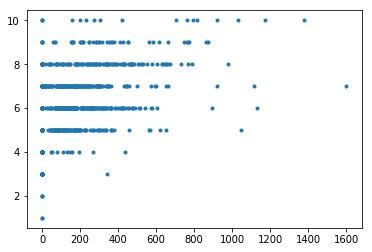

In [13]:
plt.plot(df_train_unmis["MasVnrArea"],df_train_unmis['OverallQual'],'.')

In [18]:
df_train[df_train["MasVnrArea"]==0]['Street']

1       Pave
3       Pave
5       Pave
8       Pave
9       Pave
10      Pave
12      Pave
15      Pave
17      Pave
18      Pave
19      Pave
21      Pave
23      Pave
24      Pave
26      Pave
28      Pave
29      Pave
30      Pave
31      Pave
32      Pave
33      Pave
36      Pave
38      Pave
39      Pave
41      Pave
42      Pave
43      Pave
44      Pave
46      Pave
47      Pave
        ... 
1407    Pave
1408    Pave
1410    Pave
1411    Pave
1412    Pave
1414    Pave
1416    Pave
1418    Pave
1421    Pave
1423    Pave
1424    Pave
1427    Pave
1430    Pave
1431    Pave
1432    Pave
1434    Pave
1436    Pave
1438    Pave
1440    Pave
1443    Pave
1445    Pave
1448    Pave
1449    Pave
1450    Pave
1453    Pave
1454    Pave
1455    Pave
1457    Pave
1458    Pave
1459    Pave
Name: Street, Length: 861, dtype: object

# Electrical

In [44]:
set(df_train['Electrical'])

{nan, 'FuseF', 'SBrkr', 'Mix', 'FuseA', 'FuseP'}

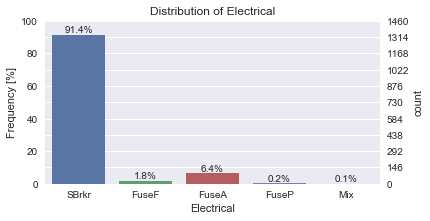

In [43]:
dis_distribution(df_train,['Electrical'])

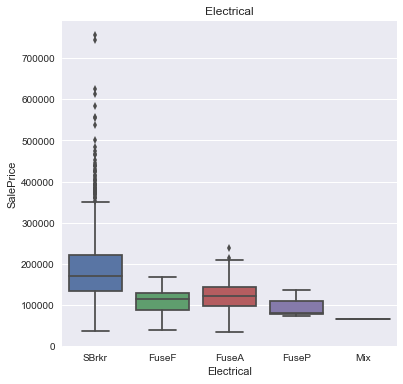

In [45]:
con_disgrap(df_train,'SalePrice',['Electrical'])

# 

In [37]:
a

[1, 0]

In [36]:
a.append(0)

In [40]:
''+a.name+''

AttributeError: 'list' object has no attribute 'name'

In [24]:
import scipy
def coor(dataframe,numvariable,targetvalue):#目标变量与其他变量相关系数和显著检验
    corr_dict={}
    for var in numvariable:
        dataframe1=dataframe[dataframe[var].notnull()]
        r,Pvalue=scipy.stats.pearsonr(dataframe1[targetvalue],dataframe1[var])   
        corr_dict[var]=[r,Pvalue]
    coor_table=pd.DataFrame(corr_dict).T
    coor_table.columns=['relation','Pvalue']
    coor_table=coor_table.applymap(lambda x: '%.4f' % x)
    return coor_table

def variance_sametest(dataframe,catvariables,targetvalue):
    variance_dict={}
    for var in catvariables:
        dataframe1=dataframe[dataframe[var].notnull()]
        value=dataframe1[var].unique()
        args=[]
        for i in list (value):
            args.append(dataframe1[dataframe1[var]==i][targetvalue])
        w,Pvalue=scipy.stats.levene(*args)
        if Pvalue>0.05:
            f,Pvalue1=scipy.stats.f_oneway(*args)
            variance_dict[var]=[w,Pvalue1]
            variance_table=pd.DataFrame(variance_dict).T
            variance_table.columns=['f','Pvalue']
            variance_table=variance_table.applymap(lambda x: '%.4f' % x)
    return variance_table

In [17]:
set(test_df_missing.Types)

{dtype('int64'), dtype('float64'), dtype('O')}

In [72]:
contain_test(train_df,test_df)#test_df不包含SalePrice

['SalePrice']


In [73]:
contain_test(test_df,train_df)

[]


In [25]:
train_df_missing=missing_value(train_df)
test_df_missing=missing_value(test_df)

In [26]:
train_msnum,train_mscat,train_nomsnum,train_nomscat=variable_divide(train_df_missing)

In [8]:
test_df_missing.to_csv("test_df_missing.csv")
train_df_missing.to_csv("train_df_missing.csv")

In [100]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 目标变量：SalePrice

In [74]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


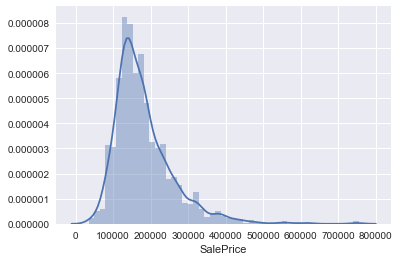

In [76]:
sns.distplot(train_df['SalePrice'])

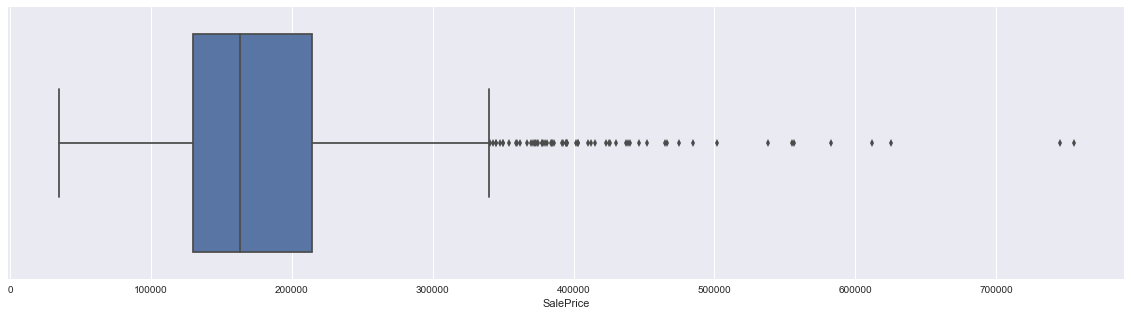

In [12]:
plt.figure(figsize=(20,5))
sns.boxplot(x=train_df['SalePrice'])

In [5]:
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(train_df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[ 3.82897043]
 [ 4.04098249]
 [ 4.49634819]
 [ 4.71041276]
 [ 4.73032076]
 [ 5.06214602]
 [ 5.42383959]
 [ 5.59185509]
 [ 7.10289909]
 [ 7.22881942]]


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [9]:
train_df.sort_values(by = 'SalePrice', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


峰度（Kurtosis）和偏度（Skewness）

峰度是描述总体中所有取值分布形态陡缓程度的统计量。这个统计量需要与正态分布相比较，峰度为0表示该总体数据分布与正态分布的陡缓程度相同；峰度大于0表示该总体数据分布与正态分布相比较为陡峭，为尖顶峰；峰度小于0表示该总体数据分布与正态分布相比较为平坦，为平顶峰。峰度的绝对值数值越大表示其分布形态的陡缓程度与正态分布的差异程度越大。


偏度与峰度类似，它也是描述数据分布形态的统计量，其描述的是某总体取值分布的对称性。这个统计量同样需要与正态分布相比较，偏度为0表示其数据分布形态与正态分布的偏斜程度相同；偏度大于0表示其数据分布形态与正态分布相比为正偏或右偏，即有一条长尾巴拖在右边，数据右端有较多的极端值；偏度小于0表示其数据分布形态与正态分布相比为负偏或左偏，即有一条长尾拖在左边，数据左端有较多的极端值。偏度的绝对值数值越大表示其分布形态的偏斜程度越大。

In [78]:
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# Relationship with numerical variables（no miss）

In [23]:
train_nomsnum

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [31]:
train_nomsnum.remove('Id')
train_nomsnum.remove('SalePrice')

D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
D:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


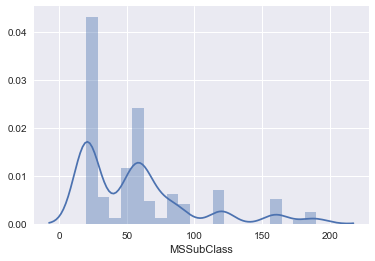

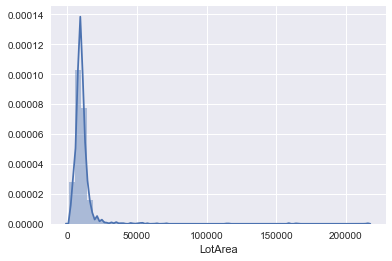

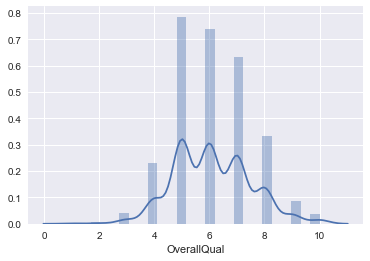

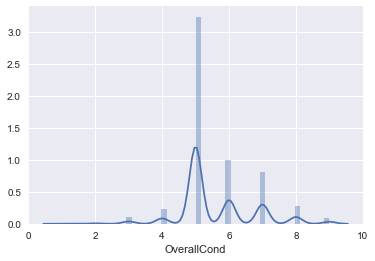

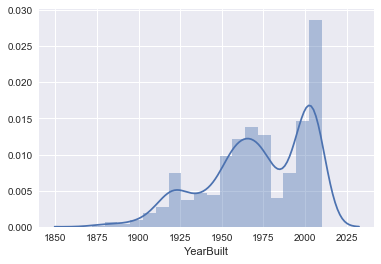

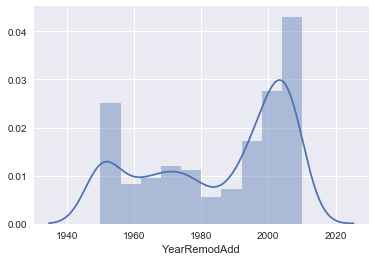

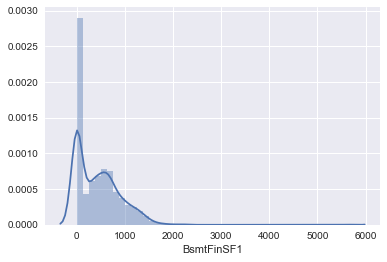

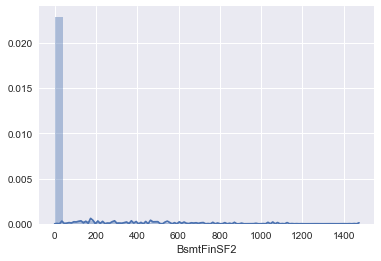

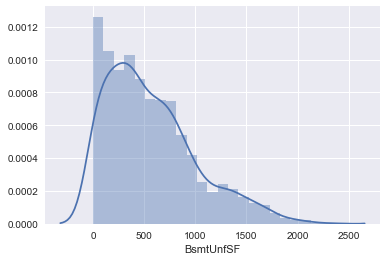

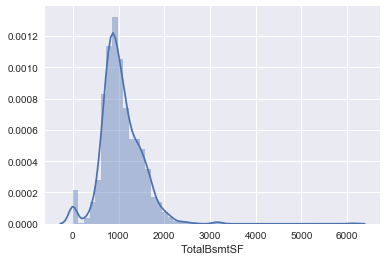

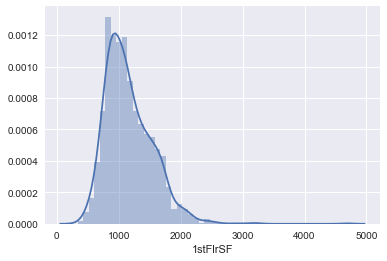

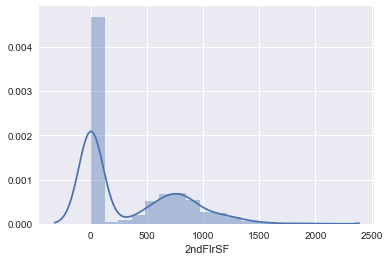

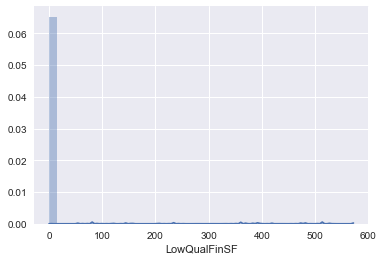

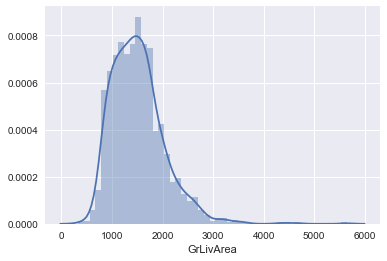

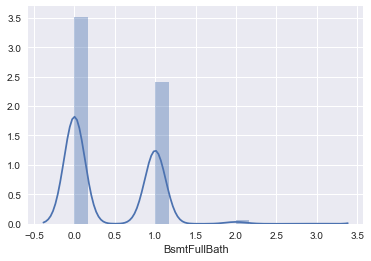

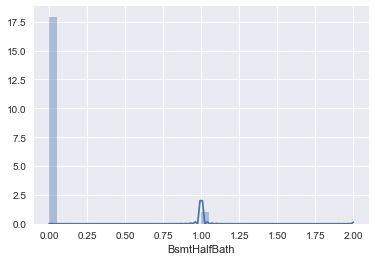

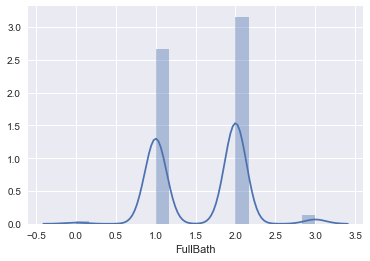

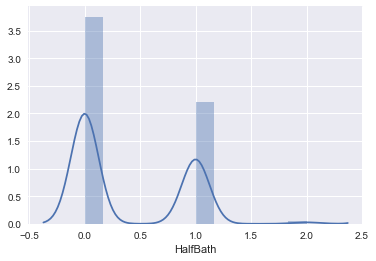

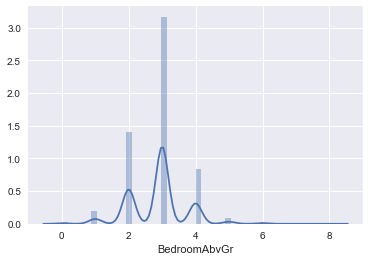

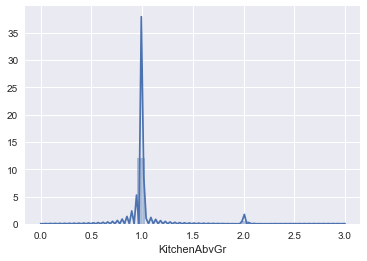

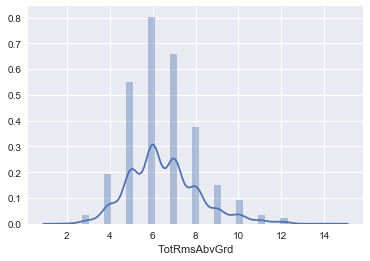

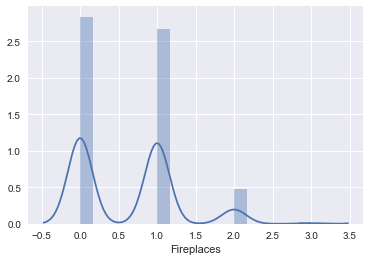

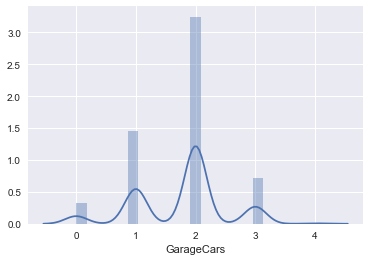

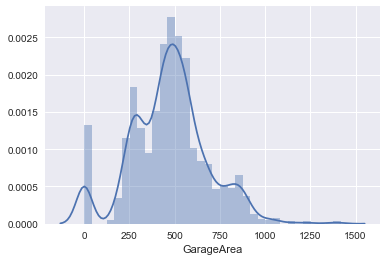

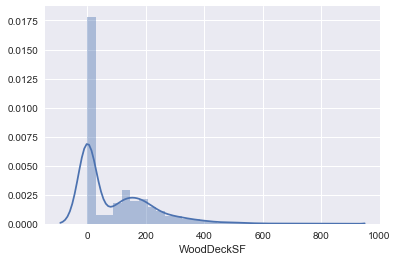

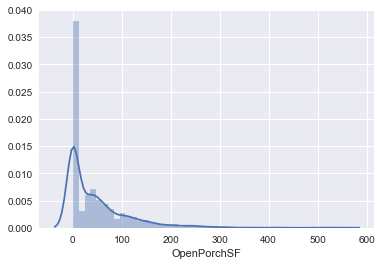

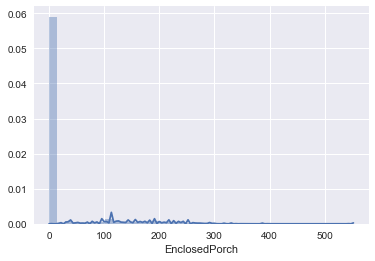

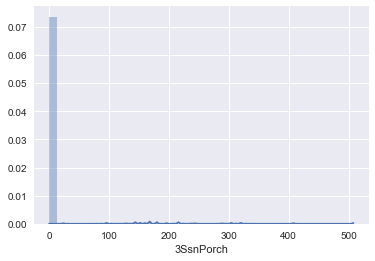

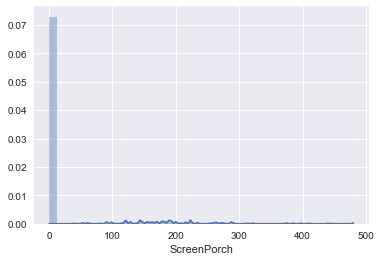

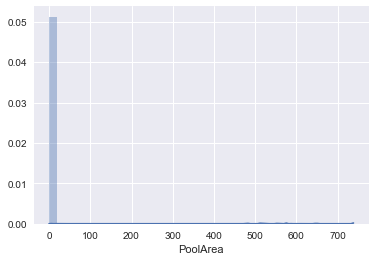

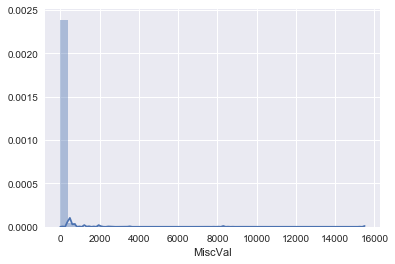

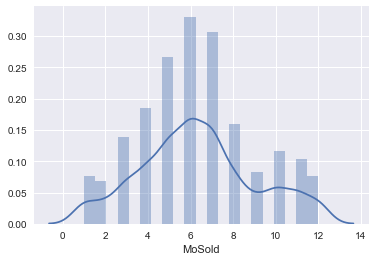

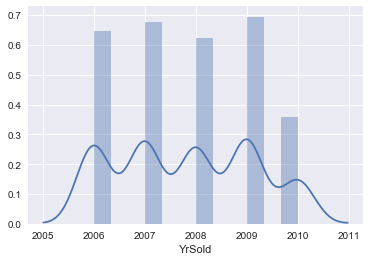

In [74]:
for var in train_nomsnum:
    plt.figure()
    sns.distplot(train_df[var])

D:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


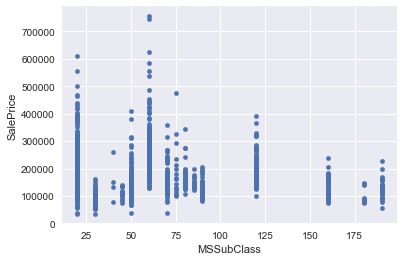

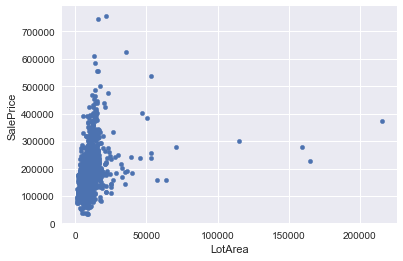

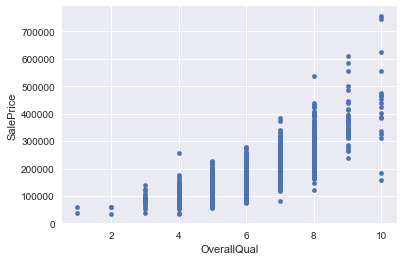

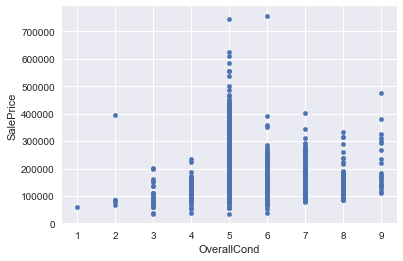

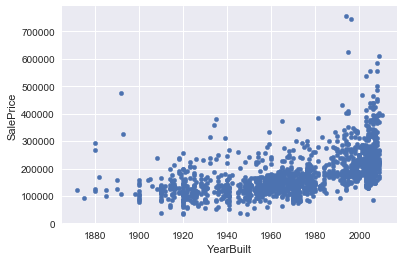

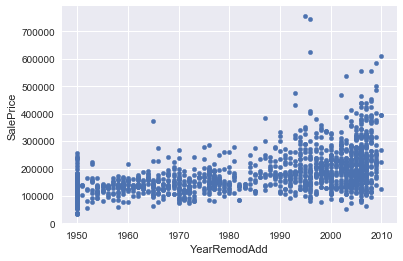

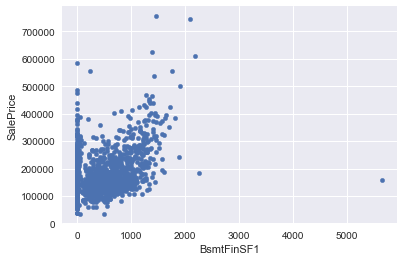

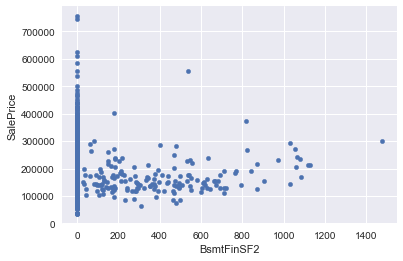

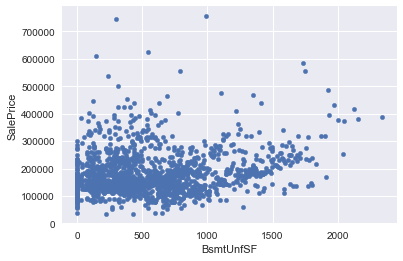

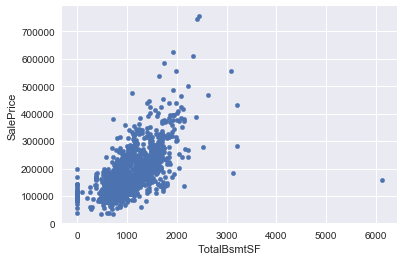

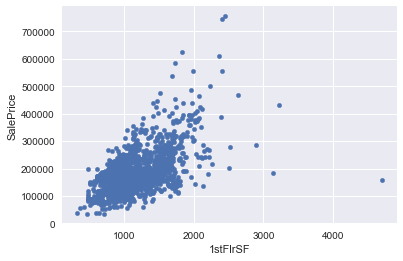

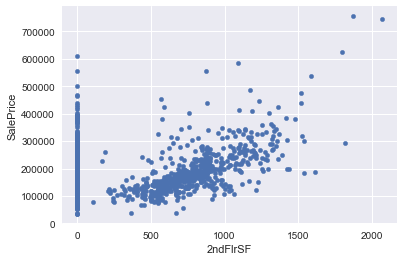

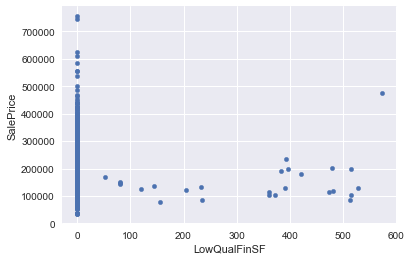

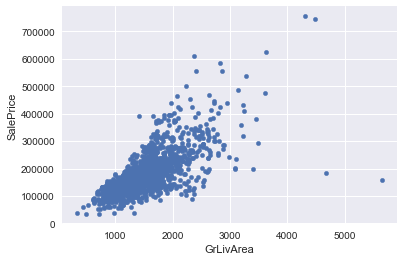

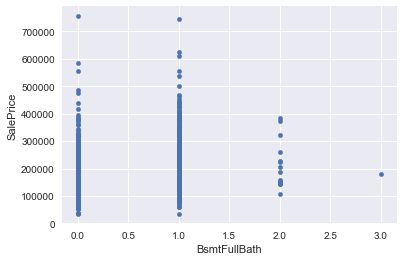

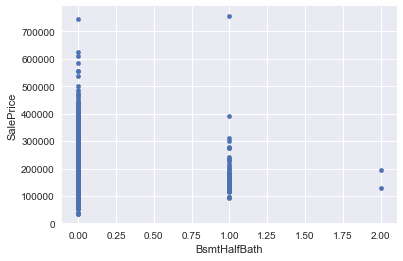

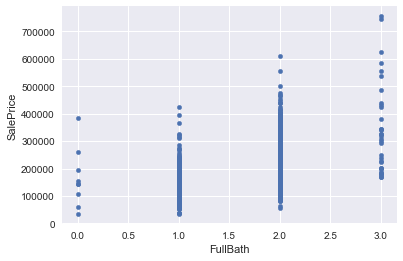

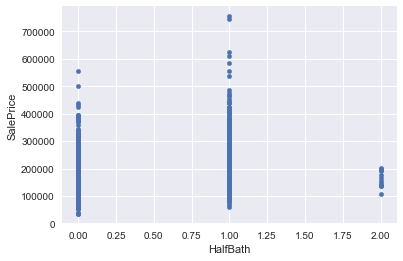

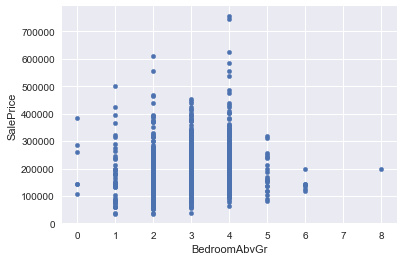

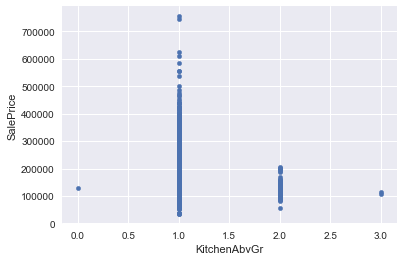

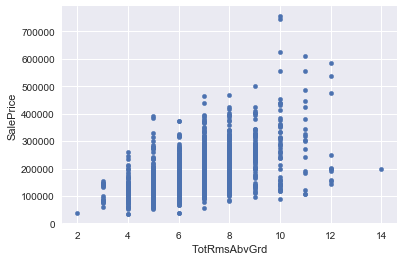

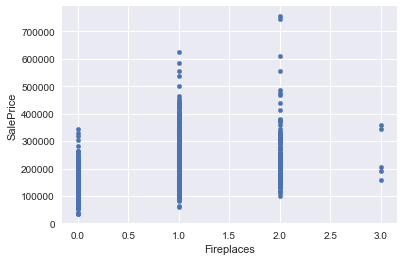

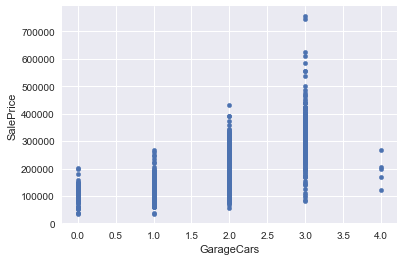

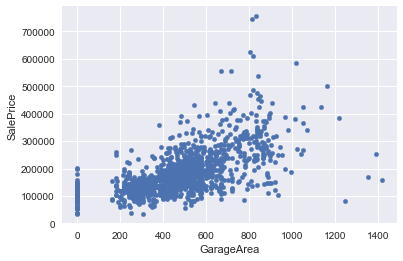

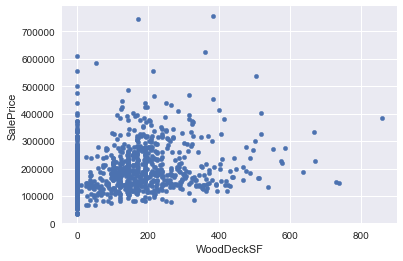

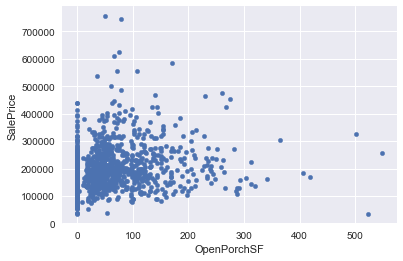

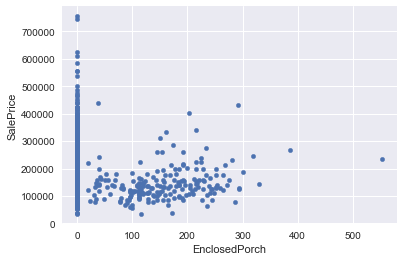

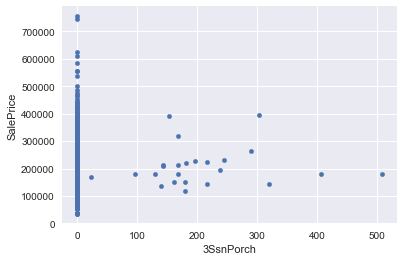

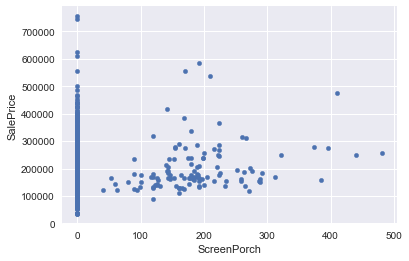

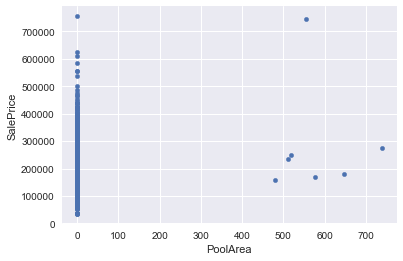

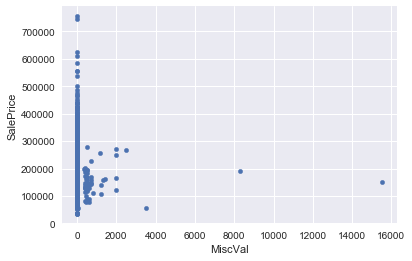

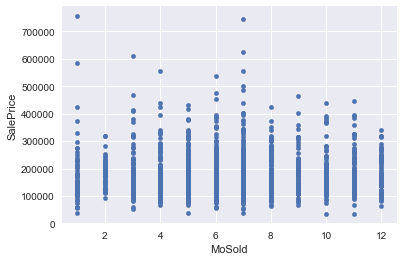

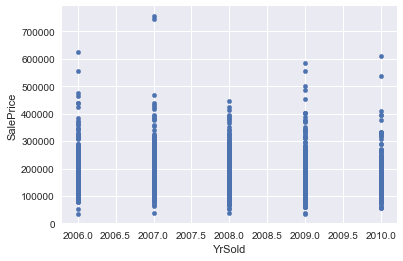

In [36]:
for var in train_nomsnum:
    data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice')

In [9]:
train_nomsnum_coor=coor(train_df,train_nomsnum,'SalePrice')

In [195]:
train_nomsnum_coor

,relation,Pvalue
1stFlrSF,0.6059,0.0000
2ndFlrSF,0.3193,0.0000
3SsnPorch,0.0446,0.0886
BedroomAbvGr,0.1682,0.0000
BsmtFinSF1,0.3864,0.0000
BsmtFinSF2,-0.0114,0.6640
BsmtFullBath,0.2271,0.0000
BsmtHalfBath,-0.0168,0.5202
BsmtUnfSF,0.2145,0.0000
EnclosedPorch,-0.1286,0.0000


In [8]:
each_coor=train_df[train_nomsnum]

In [204]:
each_coor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
MSSubClass       1460 non-null int64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageCars       1460 non-null int64
GarageArea       1460 non-null int64
WoodD

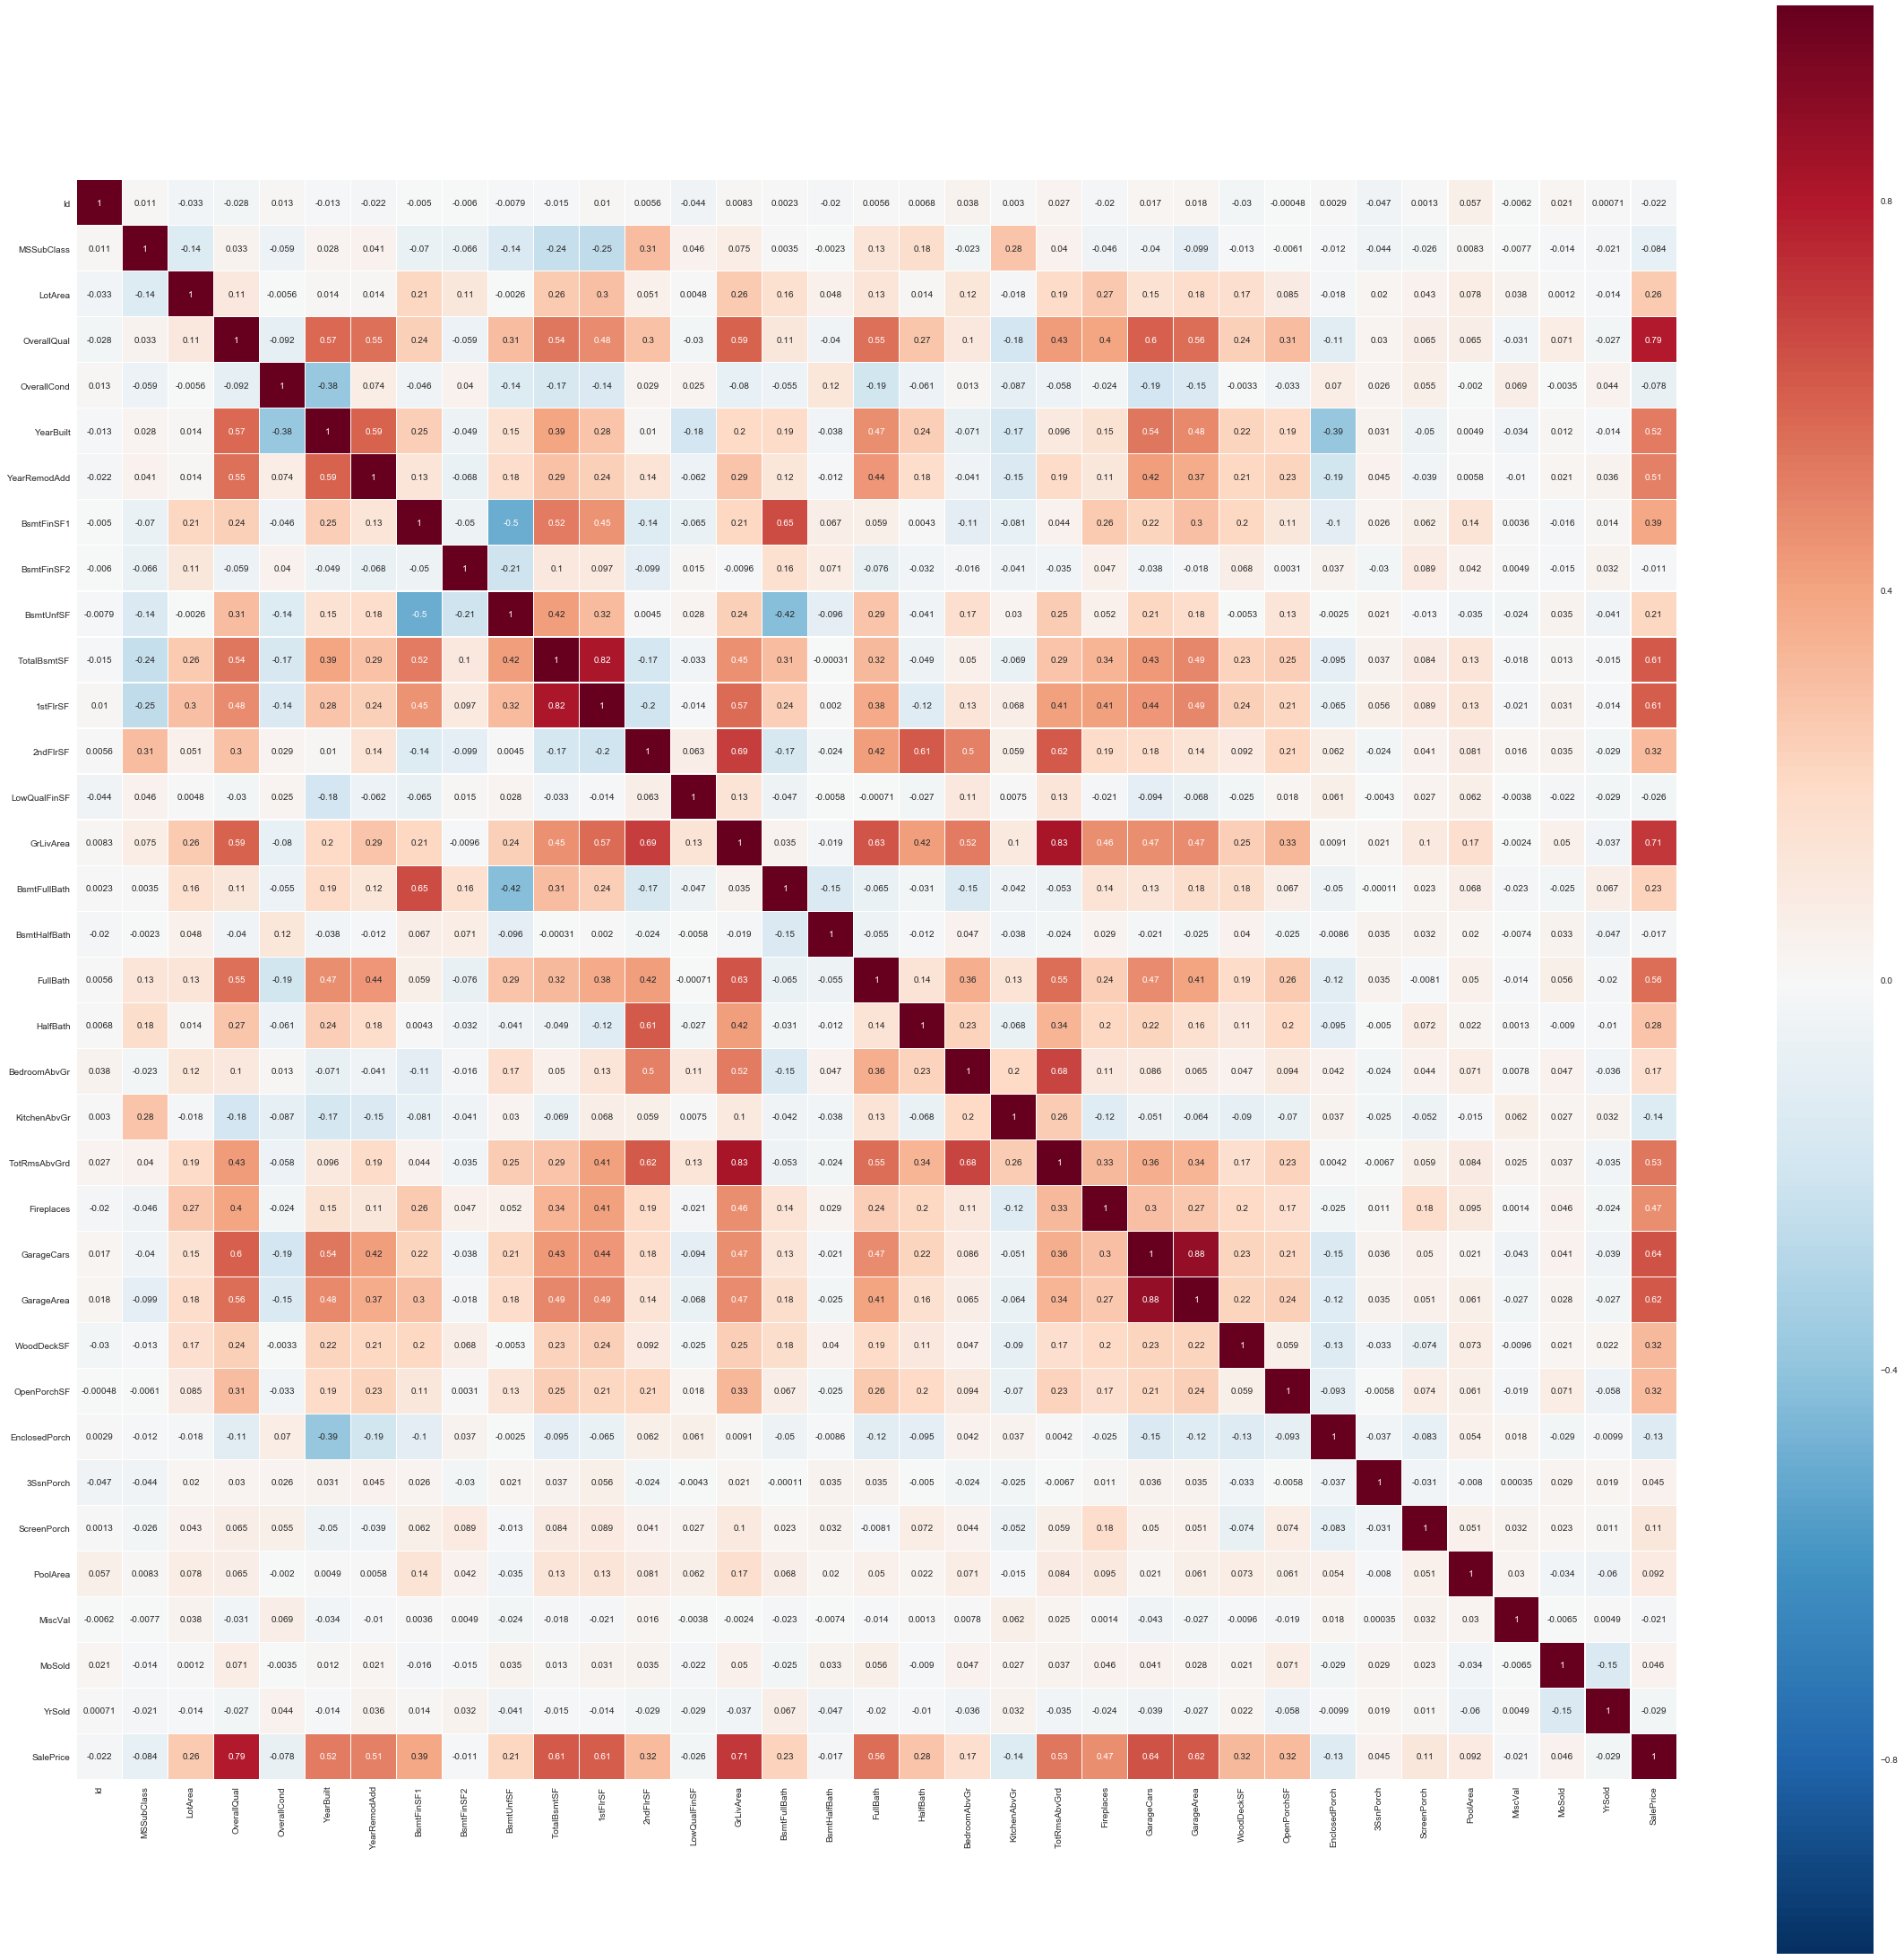

In [10]:
corrmat = each_coor.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corrmat, vmin=corrmat.values.min(), vmax=1, square=True, linewidths=0.1,
         annot=True, annot_kws={"size":10})

# Relationship with numerical variables（ miss）

In [24]:
train_msnum

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


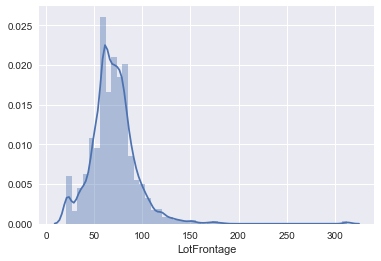

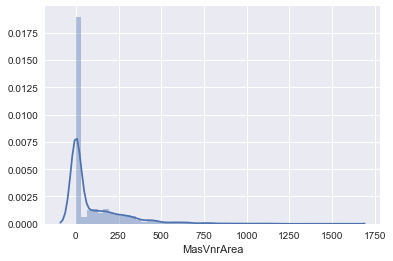

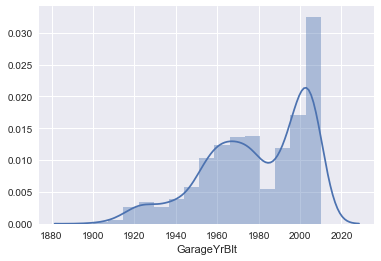

In [76]:
for var in train_msnum:
    plt.figure()
    sns.distplot(train_df[train_df[var].notnull()][var])

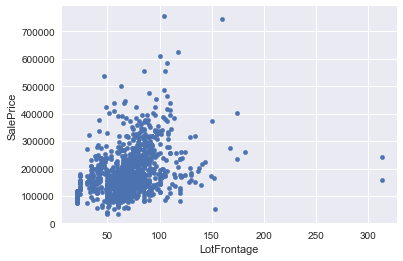

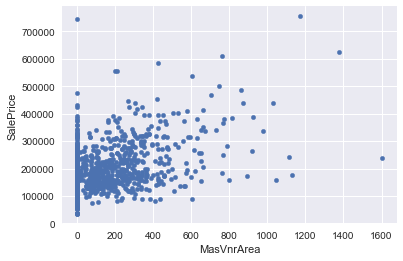

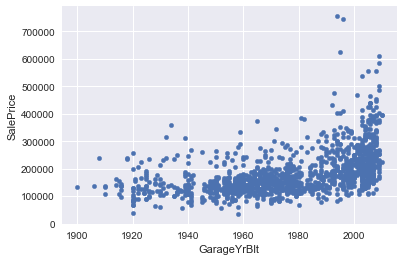

In [80]:
for var in train_msnum:
    plt.figure()
    df=train_df[train_df[var].notnull()]
    data = pd.concat([df['SalePrice'], df[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice')

In [10]:
train_msnum_coor=coor(train_df,train_msnum,'SalePrice')
train_msnum_coor

,relation,Pvalue
GarageYrBlt,0.4864,0.0000
LotFrontage,0.3518,0.0000
MasVnrArea,0.4775,0.0000


In [27]:
GarageYrBlt_df=train_df[train_df['GarageYrBlt'].notnull()]
GarageYrBlt_coor=coor(GarageYrBlt_df,train_msnum,'GarageYrBlt')
GarageYrBlt_coor

,relation,Pvalue
GarageYrBlt,1.0000,0.0000
LotFrontage,0.0702,0.0183
MasVnrArea,0.2527,0.0000


In [28]:
GarageYrBlt_coor2=coor(GarageYrBlt_df,train_nomsnum,'GarageYrBlt')
GarageYrBlt_coor2

,relation,Pvalue
1stFlrSF,0.2334,0.0000
2ndFlrSF,0.0708,0.0085
3SsnPorch,0.0235,0.3823
BedroomAbvGr,-0.0645,0.0166
BsmtFinSF1,0.1535,0.0000
BsmtFinSF2,-0.0880,0.0011
BsmtFullBath,0.1246,0.0000
BsmtHalfBath,-0.0775,0.0040
BsmtUnfSF,0.1907,0.0000
EnclosedPorch,-0.2970,0.0000


In [30]:
MasVnrArea_df=train_df[train_df['MasVnrArea'].notnull()]
MasVnrArea_coor2=coor(MasVnrArea_df,train_nomsnum,'MasVnrArea')
MasVnrArea_coor2

,relation,Pvalue
1stFlrSF,0.3445,0.0000
2ndFlrSF,0.1746,0.0000
3SsnPorch,0.0188,0.4742
BedroomAbvGr,0.1028,0.0001
BsmtFinSF1,0.2647,0.0000
BsmtFinSF2,-0.0723,0.0058
BsmtFullBath,0.0853,0.0011
BsmtHalfBath,0.0267,0.3098
BsmtUnfSF,0.1144,0.0000
EnclosedPorch,-0.1102,0.0000


In [11]:
train_numcoor=pd.concat([train_nomsnum_coor,train_msnum_coor])
train_numcoor

,relation,Pvalue
1stFlrSF,0.6059,0.0000
2ndFlrSF,0.3193,0.0000
3SsnPorch,0.0446,0.0886
BedroomAbvGr,0.1682,0.0000
BsmtFinSF1,0.3864,0.0000
BsmtFinSF2,-0.0114,0.6640
BsmtFullBath,0.2271,0.0000
BsmtHalfBath,-0.0168,0.5202
BsmtUnfSF,0.2145,0.0000
EnclosedPorch,-0.1286,0.0000


In [200]:
train_numcoor.to_csv("train_numcoor.csv")

In [22]:
train_cm=pd.concat([train_numcoor,train_df_missing],axis=1)

In [23]:
train_cm.to_csv("train_cm.csv")

# Relationship with categorical features（no miss）

In [101]:
train_nomscat

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

D:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


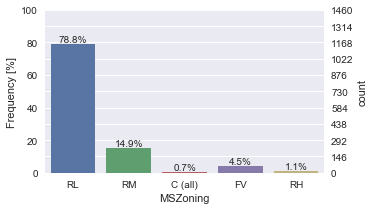

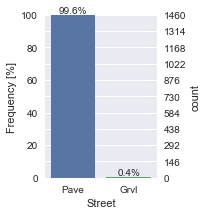

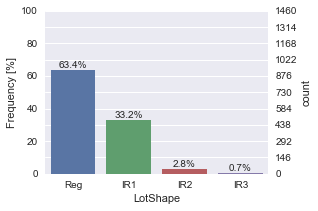

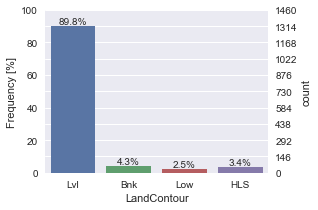

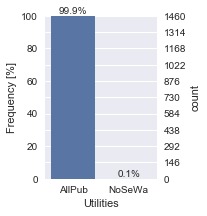

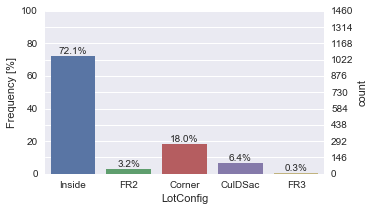

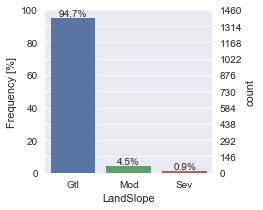

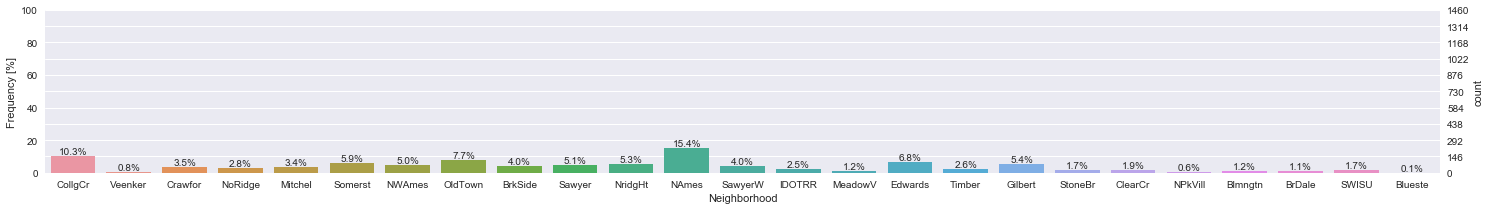

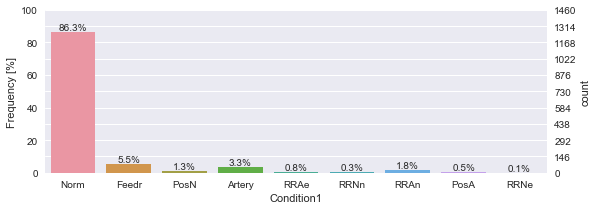

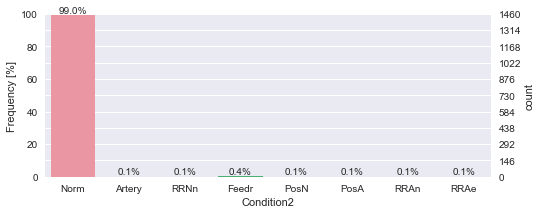

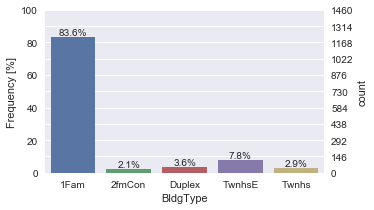

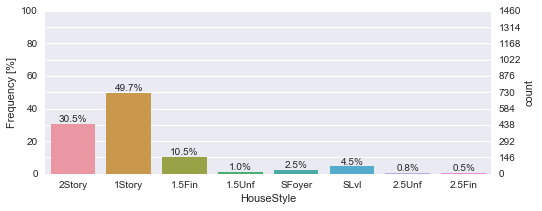

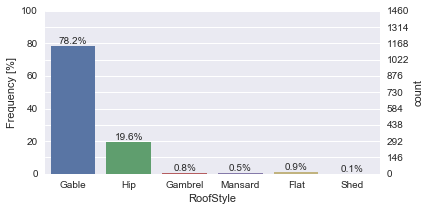

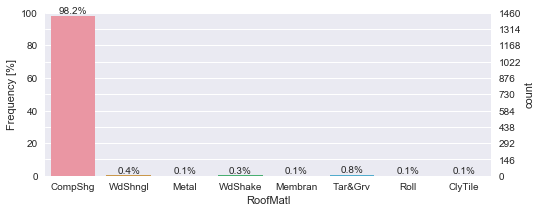

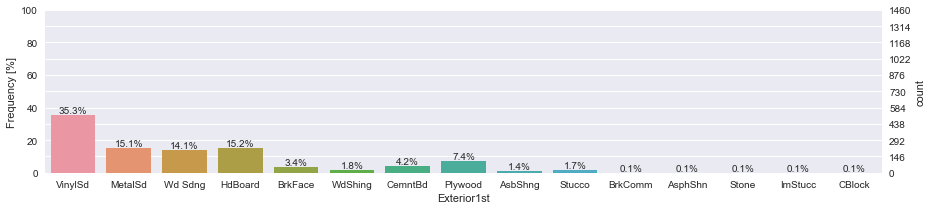

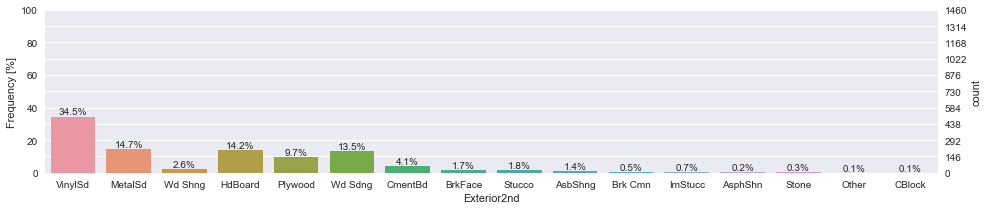

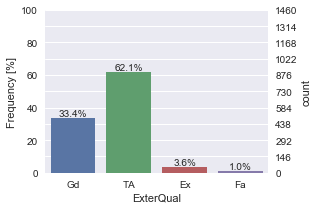

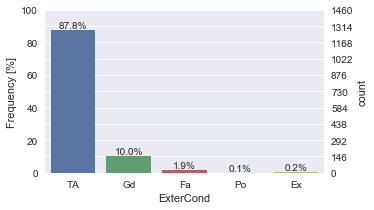

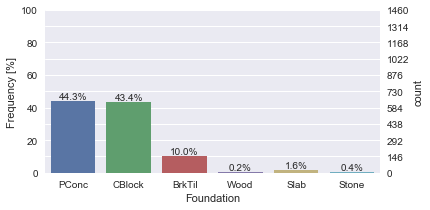

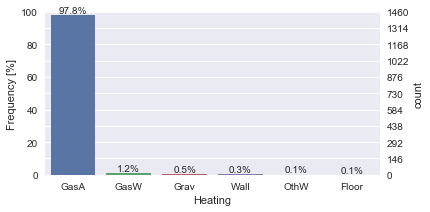

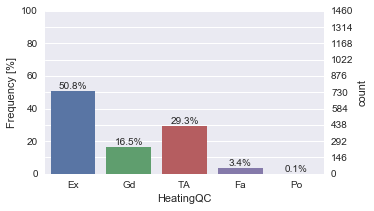

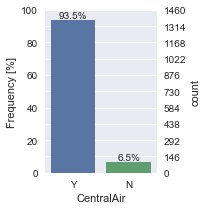

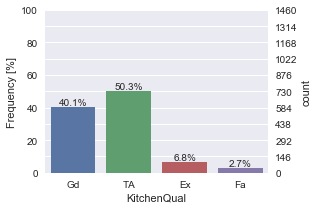

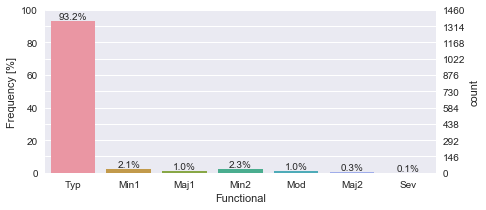

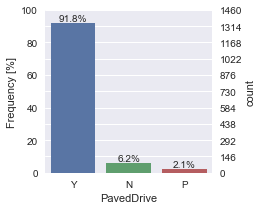

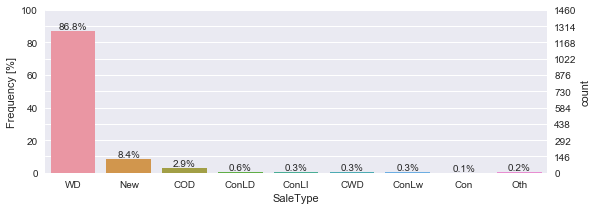

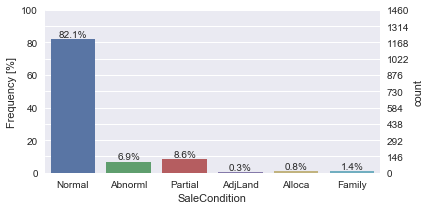

In [45]:
import matplotlib.ticker as ticker
# Some random data
for var in train_nomscat:
    valuelen=len(set(train_df[var]))
    plt.figure(figsize=(valuelen,3))
    ncount = len(train_df[var])
    
    ax = sns.countplot(x=var, data=train_df)
    #plt.title('Distribution of Truck Configurations')
    #plt.xlabel('Number of Axles')
    # Make twin axis
    ax2=ax.twinx()
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    
    ax2.set_ylabel('Frequency [%]')
    
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                    ha='center', va='bottom') # set the alignment of the text
# Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
    #ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)

D:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


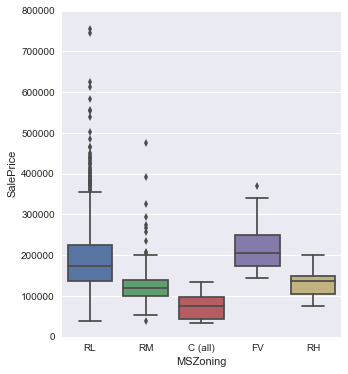

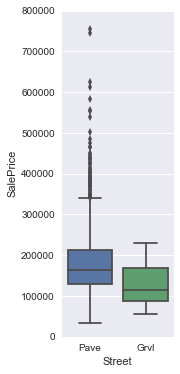

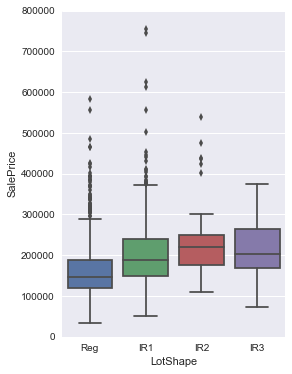

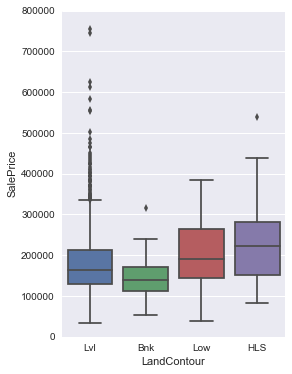

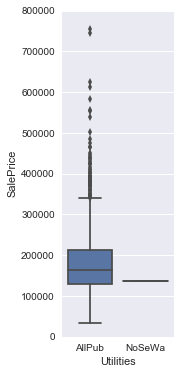

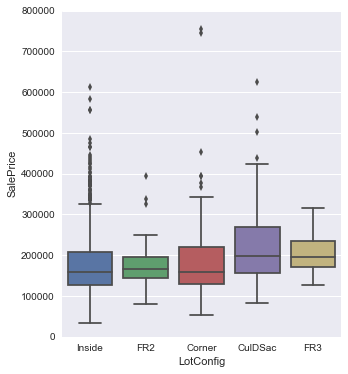

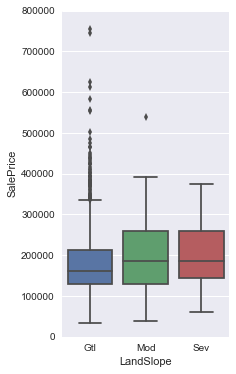

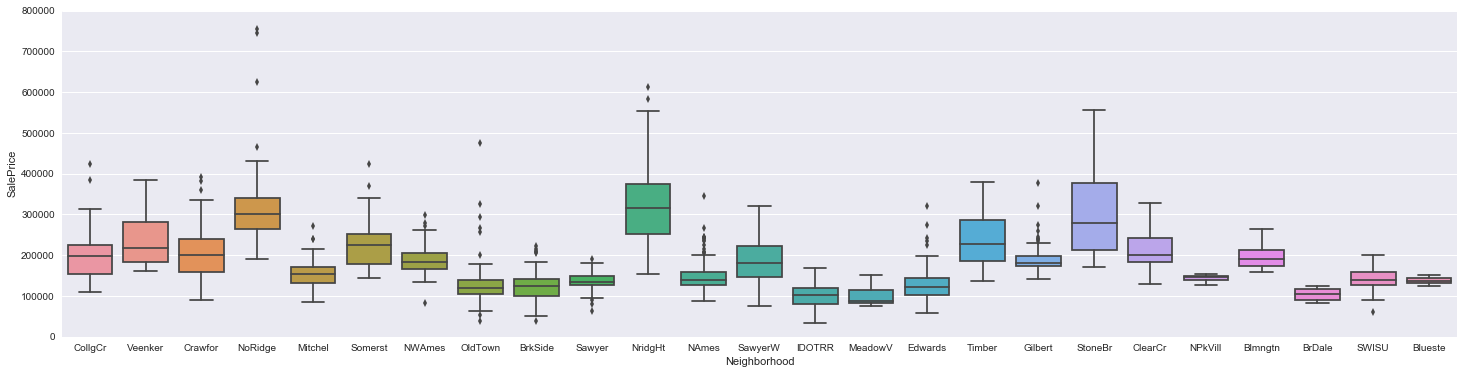

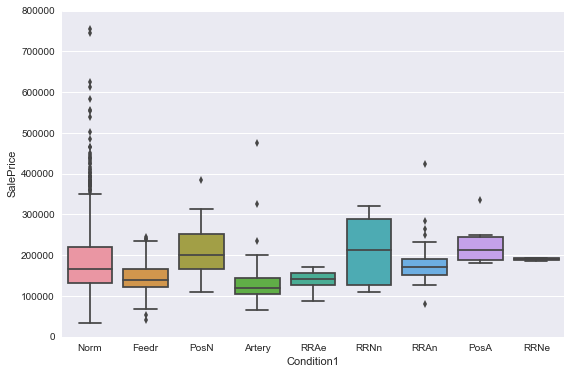

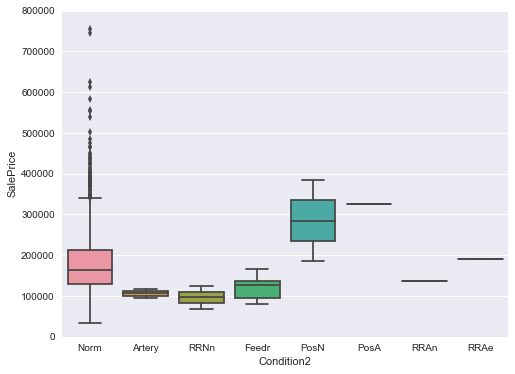

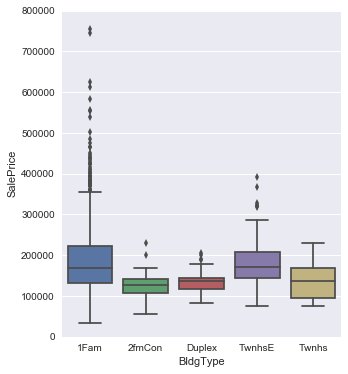

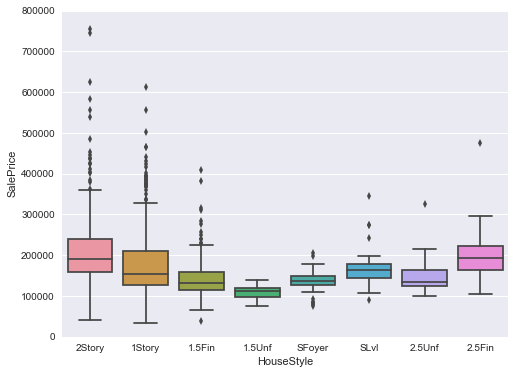

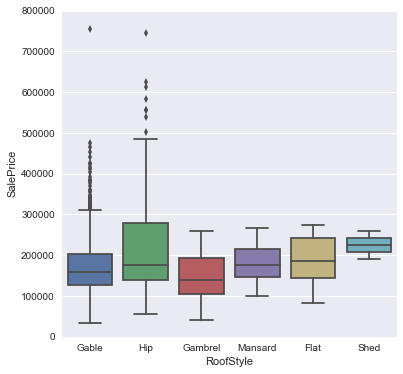

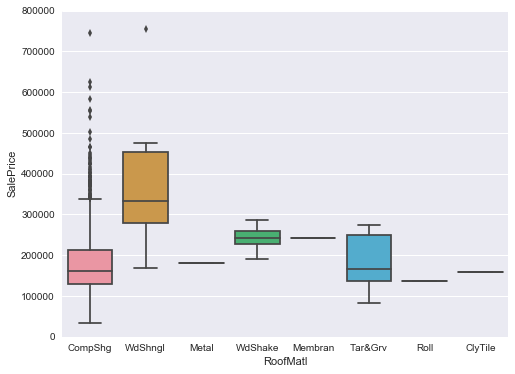

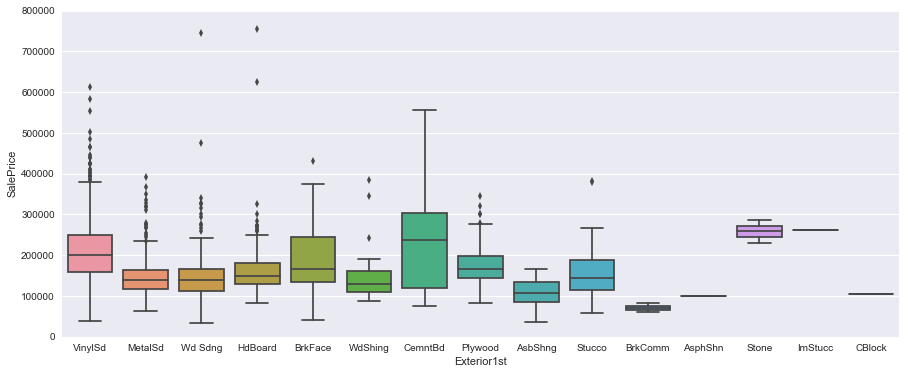

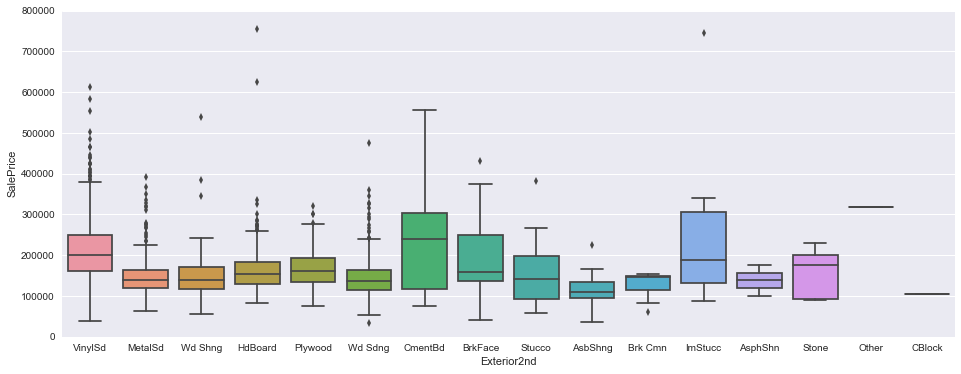

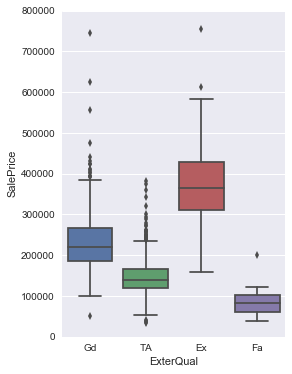

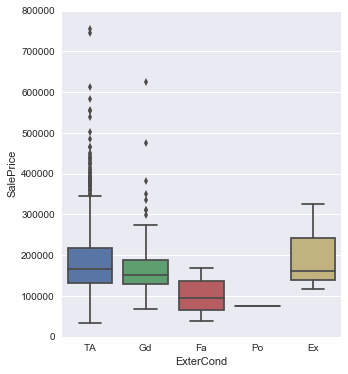

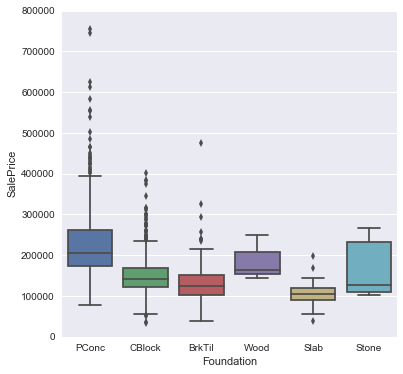

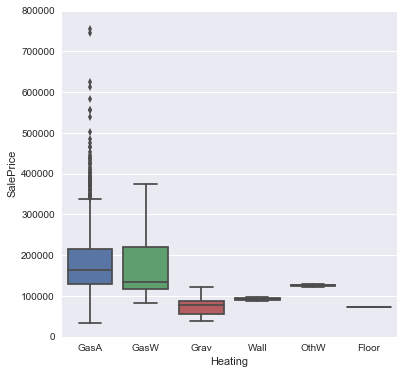

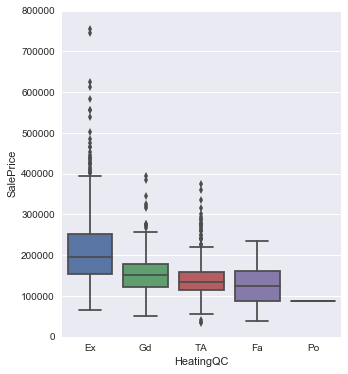

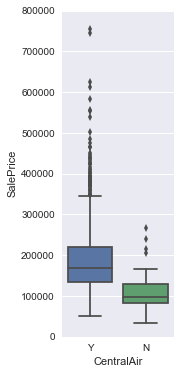

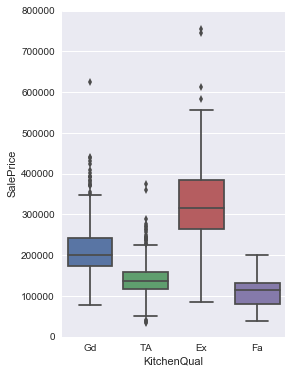

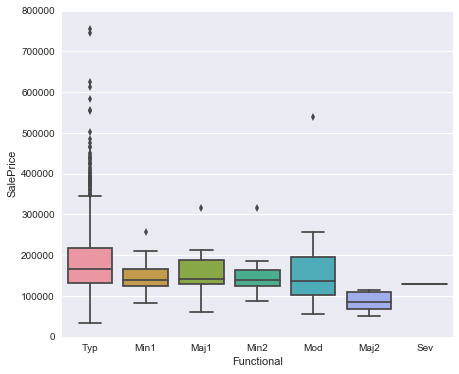

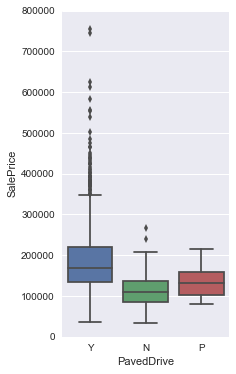

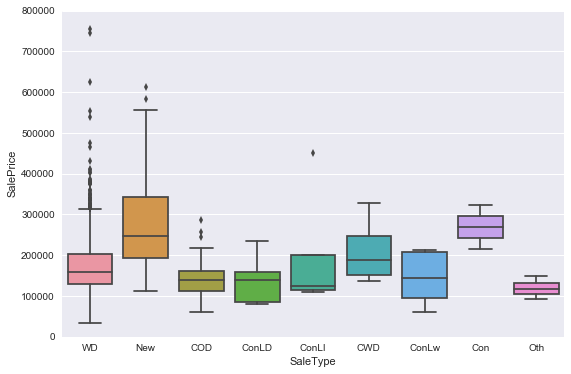

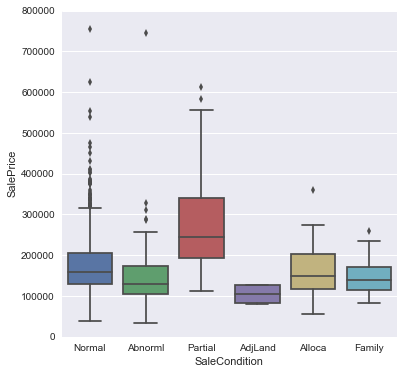

In [187]:
for var in train_nomscat:
    valuelen=len(set(train_df[var]))
    f, ax = plt.subplots(figsize=(valuelen, 6))
    data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)

单因素方差分析（oneway ANOVA）； 两因素方差分析（two way ANOVA）.单因素方差中只有一个自变量,两因素方差中有两个自变量.举个例：有三种教学方法（A1,A2,A3）,我们要检测哪种教学方法最好,这是单因素方差分析,因为只有一个自变量---教学方法（但是有三个水平）.如果我们要检测这三种教学方法对不同年纪学生（高年级,低年级）的影响,就是两因素方差分析,因为此时有两个自变量：教学方法（A1,A2,A3）学生年级（B1,B2）.两因素方差分析主要检测两个自变量之间的是否有显著的interaction.刚才那个例子是个3X2的两因素方差分析,两个自变量就有6种组合,A1B1,A2B1,A3B1,A1B2,A2B2,A3B2,我们做两因素方差分析就是要检测这六种组合同哪种最显著.

In [176]:
s=variance_sametest(train_df,train_nomscat,'SalePrice')

In [177]:
s

,f,Pvalue
Condition2,0.9911,0.0434
ExterCond,2.1554,0.0000
Heating,1.5433,0.0008
LandSlope,2.5965,0.1414
LotConfig,1.0157,0.0000
Street,0.0983,0.1170
Utilities,0.8692,0.5847


# Relationship with categorical features（miss）

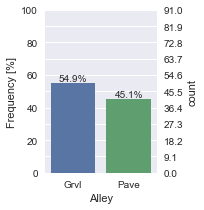

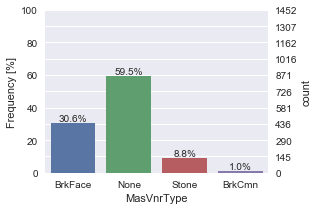

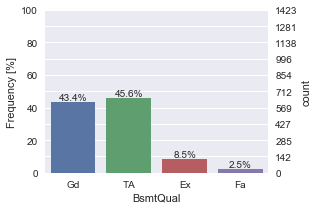

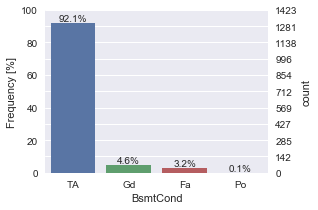

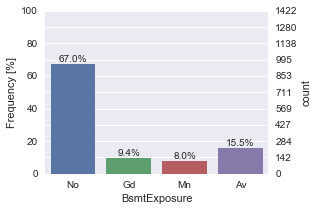

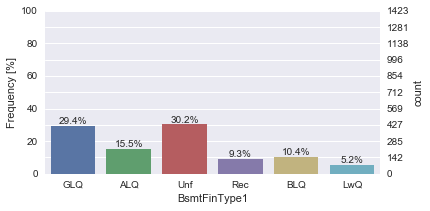

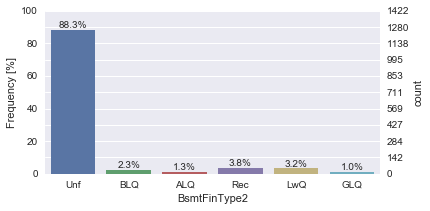

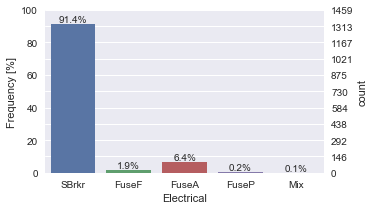

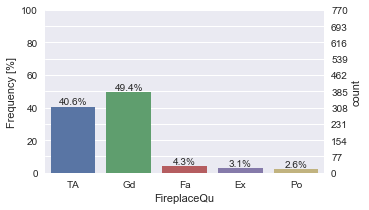

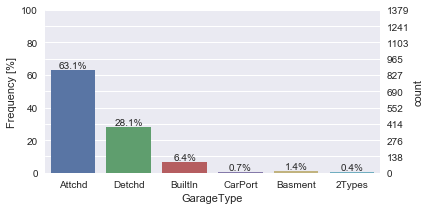

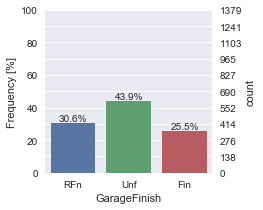

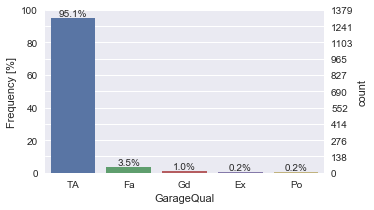

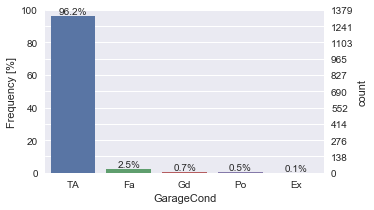

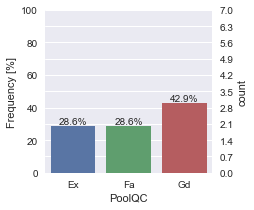

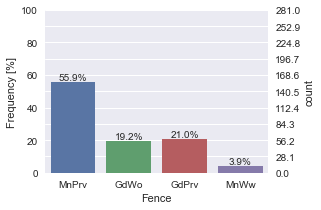

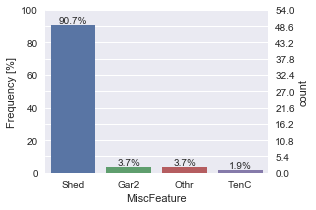

In [46]:
# Some random data
for var in train_mscat:
    train_dfms=train_df[train_df[var].notnull()]
    valuelen=len(set(train_dfms[var]))
    plt.figure(figsize=(valuelen,3))
    ncount = len(train_dfms[var])
    
    ax = sns.countplot(x=var, data=train_dfms)
    #plt.title('Distribution of Truck Configurations')
    #plt.xlabel('Number of Axles')
    # Make twin axis
    ax2=ax.twinx()
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    
    ax2.set_ylabel('Frequency [%]')
    
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                    ha='center', va='bottom') # set the alignment of the text
# Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
    #ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)

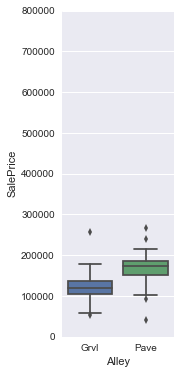

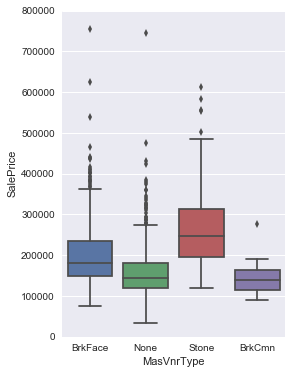

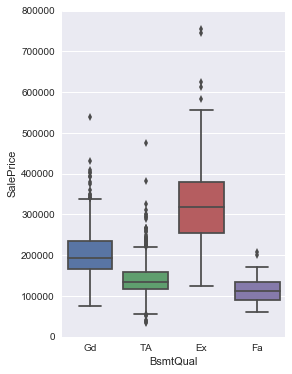

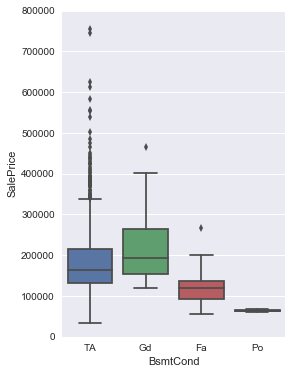

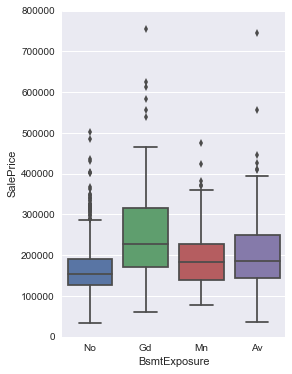

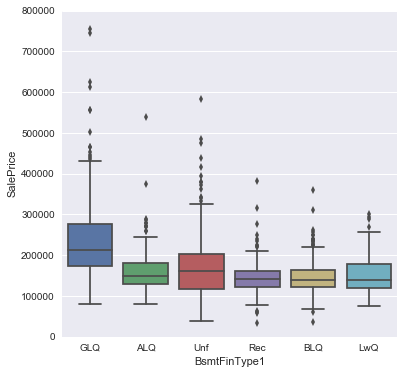

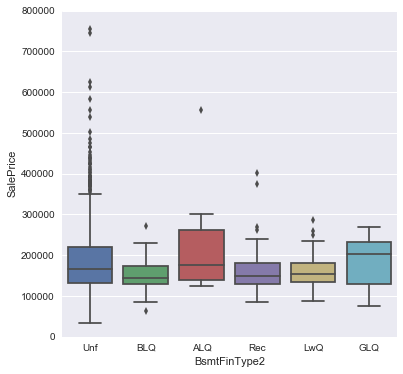

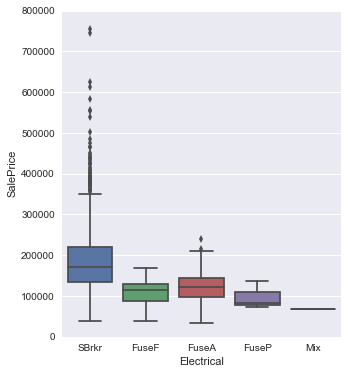

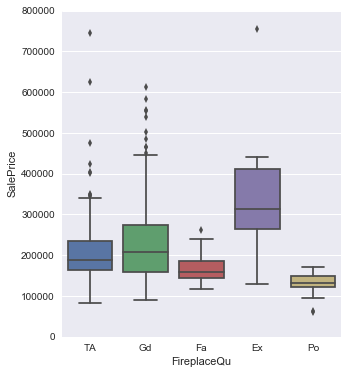

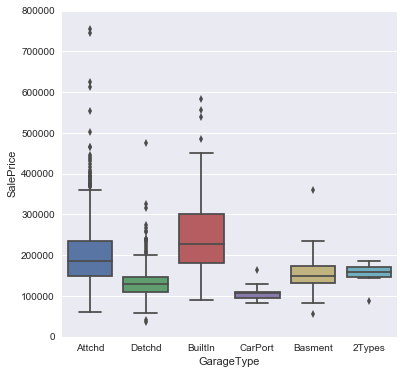

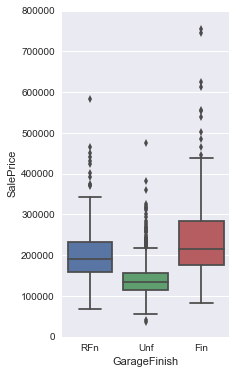

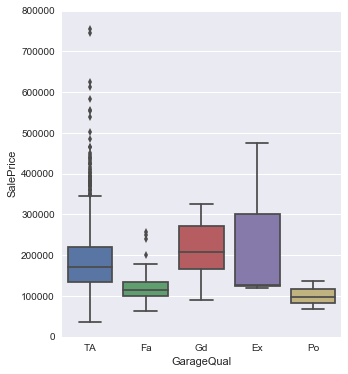

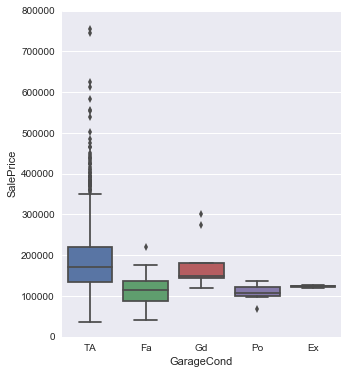

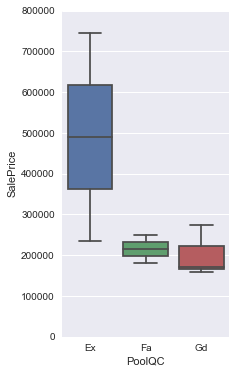

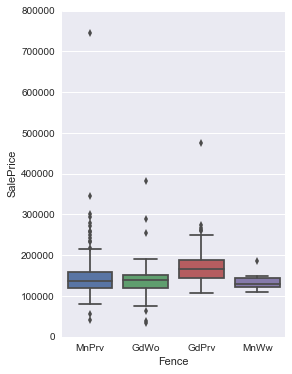

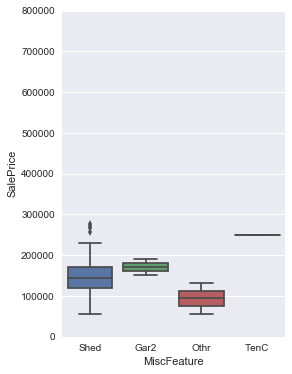

In [189]:
for var in train_mscat:
    train_dfmsc=train_df[train_df[var].notnull()]
    valuelen=len(set(train_dfmsc[var]))
    f, ax = plt.subplots(figsize=(valuelen, 6))
    data = pd.concat([train_dfmsc['SalePrice'], train_dfmsc[var]], axis=1)
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)

In [190]:
def variance_sametest(dataframe,catvariables,targetvalue):
    variance_dict={}
    for var in catvariables:
        dataframe1=dataframe[dataframe[var].notnull()]
        value=dataframe1[var].unique()
        args=[]
        for i in list (value):
            args.append(dataframe1[dataframe1[var]==i][targetvalue])
        w,Pvalue=scipy.stats.levene(*args)
        if Pvalue>0.05:
            f,Pvalue1=scipy.stats.f_oneway(*args)
            variance_dict[var]=[w,Pvalue1]
            variance_table=pd.DataFrame(variance_dict).T
            variance_table.columns=['f','Pvalue']
            variance_table=variance_table.applymap(lambda x: '%.4f' % x)
    return variance_table

In [191]:
k=variance_sametest(train_df,train_mscat,'SalePrice')

In [192]:
k

,f,Pvalue
Alley,0.0831,0.0000
Fence,0.5311,0.0023
MiscFeature,0.6629,0.1047


# 缺失值处理

In [ ]:
#删除缺失值

In [17]:
miss_dell1=list(train_df_missing[train_df_missing['Percent']>0.15].index)

In [18]:
miss_dell1#删除缺失值在15%以上的变量

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [20]:
train_df1=train_df.drop(miss_dell1,axis=1)

In [21]:
person=missing_value(train_df1.T)

In [25]:
len(train_df1.columns)#变量75

75

In [ ]:
含缺失值的样本占比

In [30]:
person[person['Total']>0]['Total'].count()/person['Total'].count()

0.083561643835616442

In [31]:
miss_dell2=['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']

In [35]:
train_df2=train_df1.drop(miss_dell2,axis=1)

In [36]:
person2=missing_value(train_df2.T)
person2[person2['Total']>0]['Total'].count()/person2['Total'].count()

0.061643835616438353

In [40]:
miss_dell3=['GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt']

In [42]:
train_df3=train_df2.drop(miss_dell3,axis=1)
person3=missing_value(train_df3.T)
person3[person3['Total']>0]['Total'].count()/person3['Total'].count()

0.0061643835616438354

In [ ]:
#填充缺失值

In [50]:
person3.sort('Total',ascending=False)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Types,Total,Percent
936,object,2,0.030769
650,object,2,0.030769
973,object,2,0.030769
1243,object,2,0.030769
977,object,2,0.030769
529,object,2,0.030769
234,object,2,0.030769
1278,object,2,0.030769
1379,object,1,0.015385
995,object,0,0.000000


In [ ]:
[234, 529, 650, 936, 973, 977, 1243, 1278, 1379]#有缺失值的样本

In [55]:
train_df3.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [60]:
mssample=train_df3.loc[[234, 529, 650, 936, 973, 977, 1243, 1278, 1379]]

In [63]:
mssample

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,216500
529,530,20,RL,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,200,0,0,0,0,3,2007,WD,Alloca,200624
650,651,60,FV,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,205950
936,937,20,RL,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2009,WD,Normal,184900
973,974,20,FV,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,12,2008,New,Partial,182000
977,978,120,FV,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,11,2007,New,Partial,199900
1243,1244,20,RL,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,New,Partial,465000
1278,1279,60,RL,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2008,WD,Normal,237000
1379,1380,80,RL,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,167500


In [64]:
mssample[['Electrical','MasVnrArea','MasVnrType']]

,Electrical,MasVnrArea,MasVnrType
234,SBrkr,NaN,NaN
529,SBrkr,NaN,NaN
650,SBrkr,NaN,NaN
936,SBrkr,NaN,NaN
973,SBrkr,NaN,NaN
977,SBrkr,NaN,NaN
1243,SBrkr,NaN,NaN
1278,SBrkr,NaN,NaN
1379,NaN,0.0,None


In [53]:
train_df4=train_df3.drop(train_df3.index[[234, 529, 650, 936, 973, 977, 1243, 1278, 1379]])

In [57]:
train_df4

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [50]:
train_df3.index[[1,2,6]]

Int64Index([1, 2, 6], dtype='int64')

In [13]:
train_df3=pd.read_csv("train_df3.csv")

In [ ]:
Electrical
MasVnrArea
MasVnrType

# 特征选择
当数据预处理完成后，我们需要选择有意义的特征输入机器学习的算法和模型进行训练。通常来说，从两个方面考虑来选择特征：

特征是否发散：如果一个特征不发散，例如方差接近于0，也就是说样本在这个特征上基本上没有差异，这个特征对于样本的区分并没有什么用。

特征与目标的相关性：这点比较显见，与目标相关性高的特征，应当优选选择。除方差法外，本文介绍的其他方法均从相关性考虑。

In [ ]:
train_df